## import some Required libraries and data 

<h3 style="text-align:center; " > <b> import libraries


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

<h3 style="text-align:center; " > <b> import data

In [100]:
data = pd.read_csv("Data/2020/survey_results_public.csv")
data_schema= pd.read_csv("Data/2020/survey_results_schema.csv")


data.shape  # find out volume of data

(64461, 61)

<h3 style="text-align:center; " > <b>what we can see when we calling specific data from files  

In [101]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows


##  Create functions for data processing

<h3 style="text-align:center; " > <b> Schedules </b></h3>

In [102]:
# Schedules with percent 

def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))

    


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """



    langs = key_Phrases   # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)

    total = len(Filtered_data)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip( langs, percent )]   # percentage


    plt.barh(langs, langs_users_num)  # Chart
    plt.yticks( range(len(langs)), new_labels) # Ylabel 

    

    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)
    

    plt.style.use(style)   # chart style

    plt.title(title)  # add title




    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)


    
    plt.show()


In [103]:
# Schedules without percent 

def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """




    langs = key_Phrases  # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # percentage



    plt.barh(langs, langs_users_num)  # chart 
    plt.yticks(range(len(langs)), new_labels) # Ylabel 



    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # chart style


    plt.title(title)  # add title

    # change the fontsize of the xtick and ytick labels
    #plt.rc('xtick', labelsize=13)
    #plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)



    plt.show()



<h3 style="text-align:center; " > <b> Increase-decrease function  (Dictionary)

In [104]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 


<h3 style="text-align:center; " > <b>Double list sorter-counter function (lists in list)

In [105]:
def Double_list_sort_count(filtered_list ,Increase_decrease):
  
  global key_Phrases    # We declare it as a global variable         reason: To use in other functions
  global Quantity       # We declare it as a global variable         reason: To use in other functions
  global union

  union = []                          # One big list                 reason: To save every list element (for easy count)

  for i in filtered_list:
      for k in i :                    # this function takes all lists elemets and add them into big list (union) 
          union.append(k)

  Counted = Counter(union)            # Count everysing into big list (union) 

  
  sorted = sort_Dictionary(Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"


  key_Phrases = []  # It contein Phrases 
  Quantity = []     # It contein Quantity of variable

  

  items = sorted.items()    # Takes items from Dictinary 

  for item in items:      
      key_Phrases.append(item[0])   # Add Phrases into Phrases' list
      Quantity.append(item[1])      # Add Quantity into Quantity' list



<h3 style="text-align:center; " > <b>The most common function for lists  (not lists in list just one list)

In [106]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_Dictionary (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list


<h3 style="text-align:center; " > <b> Rare functions

In [107]:

def Stacking_Less_than_5( data_list):   # This function sorts variables
    
    global full_info

    full_info = {}


    Less_than_5 = []
    from_5_9 = []
    from_10_14 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    more_50 = []



    for i in data_list:     # Distribution function

        if i in ["1", "2" ,"3" ,"4", "Less than 1 year"]:
            Less_than_5.append(i)
        elif i in ["5","6","7","8","9"]:
            from_5_9.append(i)
        elif i in ["10","11","12","13","14"]:
            from_10_14.append(i)
        elif i in ["15","16","17","18","19"]:
            from_15_19.append(i)
        elif i in ["20","21","22","23","24"]:
            from_20_24.append(i)
        elif i in ["25","26","27","28","29"]:
            from_25_29.append(i)
        elif i in ["30","31","32","33","34"]:
            from_30_34.append(i)
        elif i in ["35","36","37","38","39"]:
            from_35_39.append(i)
        elif i in ["40","41","42","43","44"]:
            from_40_44.append(i)
        elif i in ["45","46","47","48","49"]:
            from_45_49.append(i)
        else :
            more_50.append(i)
    

    Less_than_5 = len(Less_than_5) 
    from_5_9 = len(from_5_9) 
    from_10_14 = len(from_10_14) 
    from_15_19 = len(from_15_19) 
    from_20_24 = len(from_20_24) 
    from_25_29 = len(from_25_29) 
    from_30_34 = len(from_30_34) 
    from_35_39 = len(from_35_39) 
    from_40_44 = len(from_40_44) 
    from_45_49 = len(from_45_49) 
    more_50 = len(more_50) 

    full_info["Less than 5 years"] = Less_than_5
    full_info["5 to 9 years"] = from_5_9
    full_info["10 to 14 years"] = from_10_14
    full_info["15 to 19 years"] = from_15_19
    full_info["20 to 24 years"] = from_20_24
    full_info["25 to 29 years"] = from_25_29
    full_info["30 to 34 years"] = from_30_34
    full_info["35 to 39 years"] = from_35_39
    full_info["40 to 44 years"] = from_40_44
    full_info["45 to 49 years"] = from_45_49
    full_info["50 years or more"] = more_50



def Stacking_Less_than_10(data_list):   # This function sorts variables

    global full_info


    full_info = {}

    
    Less_than_10 = []
    from_10_11 = []
    from_12_13 = []
    from_14_15 = []
    from_16_17 = []
    from_18_19 = []
    from_20_21 = []
    from_22_23 = []
    from_24_25 = []
    from_26_27 = []
    from_28_29 = []
    more_30= []



    for i in data_list:     # Distribution function

        if i in ["1", "2" ,"3" ,"4","5","6","7","8","9", "Younger than 5 years"]:
            Less_than_10.append(i)
        elif i in ["10","11"]:
            from_10_11.append(i)
        elif i in ["12","13"]:
            from_12_13.append(i)
        elif i in ["14","15"]:
            from_14_15.append(i)
        elif i in ["16","17"]:
            from_16_17.append(i)
        elif i in ["18","19"]:
             from_18_19.append(i)
        elif i in ["20","21"]:
            from_20_21.append(i)
        elif i in ["22","23"]:
            from_22_23.append(i)
        elif i in ["24","25"]:
            from_24_25.append(i)
        elif i in ["26","27"]:
            from_26_27.append(i)
        elif i in ["28","29"]:
            from_28_29.append(i)
        else :
            more_30.append(i)
    

        aLess_than_10 = len(Less_than_10) 
        afrom_10_11 = len(from_10_11) 
        afrom_12_13 = len(from_12_13) 
        afrom_14_15 = len(from_14_15) 
        afrom_16_17 = len(from_16_17) 
        afrom_18_19 = len(from_18_19) 
        afrom_20_21 = len(from_20_21) 
        afrom_22_23 = len(from_22_23) 
        afrom_24_25 = len(from_24_25) 
        afrom_26_27 = len(from_26_27) 
        afrom_28_29 = len(from_28_29) 
        amore_30 = len(more_30) 

        full_info["Younger than 10 years"] = aLess_than_10
        full_info["10 to 11 years old"] = afrom_10_11
        full_info["12 to 13 years old"] = afrom_12_13
        full_info["14 to 15 years old"] = afrom_14_15
        full_info["16 to 17 years old"] = afrom_16_17
        full_info["18 to 19 years old"] = afrom_18_19
        full_info["20 to 21 years old"] = afrom_20_21
        full_info["22 to 23 years old"] = afrom_22_23
        full_info["24 to 25 years old"] = afrom_24_25
        full_info["26 to 27 years old"] = afrom_26_27
        full_info["28 to 29 years old"] = afrom_28_29
        full_info["30 years old or older"] = amore_30



def Stacking_Less_than_15(data_list):   # This function sorts variables

    global full_info


    full_info = {}

    
    Less_than_15 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    from_50_54 = []
    from_55_59 = []
    more_60 = []
   



    for i in data_list:   # Distribution function

        if int(i) in list(range(1,15)):
            Less_than_15.append(i)

        elif int(i) in list(range(15,20)):
            from_15_19.append(i)

        elif int(i) in list(range(20,25)):
            from_20_24.append(i)

        elif int(i) in list(range(25,30)):
            from_25_29.append(i)

        elif int(i) in list(range(30,35)):
            from_30_34.append(i)

        elif int(i) in list(range(35,40)):
            from_35_39.append(i)

        elif int(i) in list(range(40,45)):
            from_40_44.append(i)

        elif int(i) in list(range(45,50)):
            from_45_49.append(i)

        elif int(i) in list(range(50,55)):
            from_50_54.append(i)

        elif int(i) in list(range(55,60)):
            from_55_59.append(i)
        else:
            more_60.append(i)
    
    

        aLess_than_15 = len(Less_than_15) 
        afrom_15_19 = len(from_15_19) 
        afrom_20_24 = len(from_20_24) 
        afrom_25_29 = len(from_25_29) 
        afrom_30_34 = len(from_30_34) 
        afrom_35_39 = len(from_35_39) 
        afrom_40_44 = len(from_40_44) 
        afrom_45_49 = len(from_45_49) 
        afrom_50_54 = len(from_50_54) 
        afrom_55_59 = len(from_55_59) 
        amore_60 = len(more_60) 
        

        full_info["Younger than 15 years"] = aLess_than_15
        full_info["15 to 19 years"] = afrom_15_19
        full_info["20 to 24 years"] = afrom_20_24
        full_info["25 to 29 years"] = afrom_25_29
        full_info["30 to 34 years"] = afrom_30_34
        full_info["35 to 39 years"] = afrom_35_39
        full_info["40 to 44 years"] = afrom_40_44
        full_info["45 to 49 years"] = afrom_45_49
        full_info["50 to 54 years"] = afrom_50_54
        full_info["55 to 59 years"] = afrom_55_59
        full_info["60 years and older"] = amore_60
 
 

def after_stacking(full_info):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions


    full_infoo = dict(reversed(list(full_info.items())))  # sort dictinary 


    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in full_infoo:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(full_infoo[i])      # Add Quantity into Quantity' list

## <h2 style="text-align:center; ">  <br > <br>  </h2>



## Developer Profile



####  Developer Roles

<h5 style="text-align:center; " > <b>Developer Type</b></h1> 


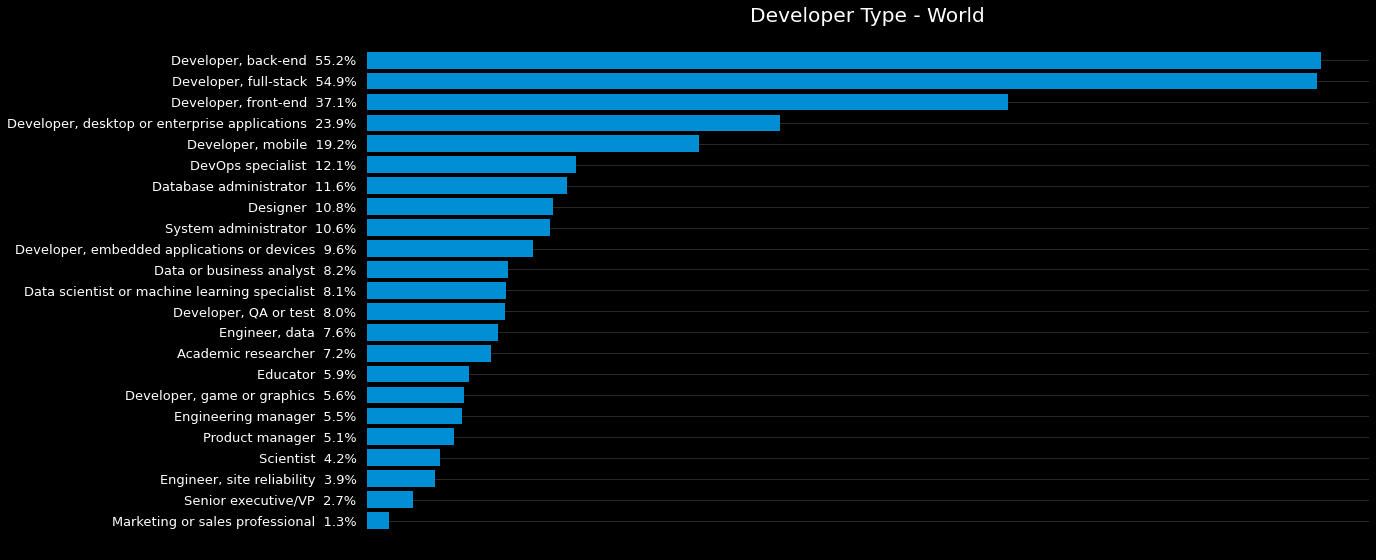

In [108]:
DevType = data["DevType"]    # We called necessary data
 
DevType.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

DevType = DevType.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(DevType , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Type - World") # Building a schedule

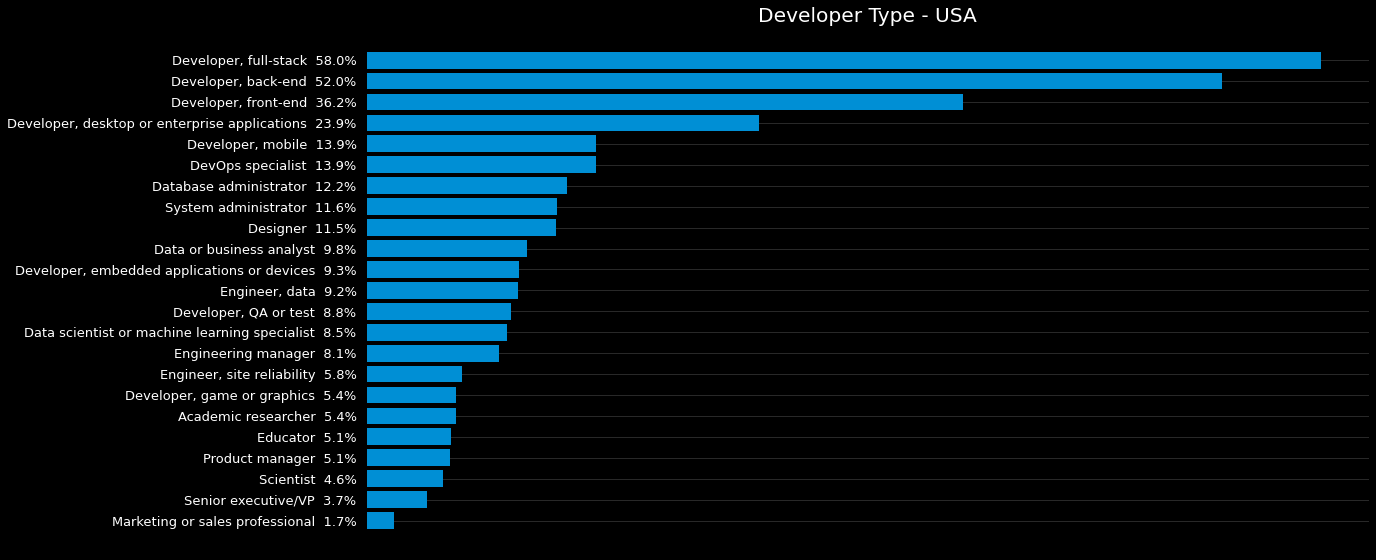

In [109]:
DevType_Filtered = data["DevType"]    # We called necessary data
 
DevType_Filtered.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # Data by specific country  (USA)



New_DevType = DevType["DevType"]  # Save our new data into new variable

New_DevType = New_DevType.str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_DevType , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Type - USA") # Building a schedule

<h5 style="text-align:center; " > <b>       Coding as a Hobby </b></h1> 

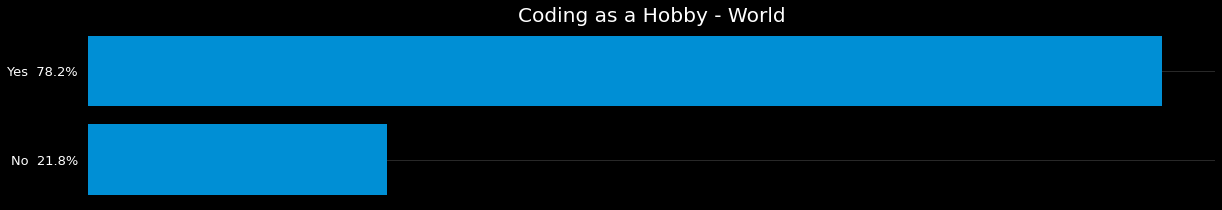

In [110]:
Hobbyist = data["Hobbyist"]    # We called necessary data
 
Hobbyist.dropna( inplace=True)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Hobbyist , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Coding as a Hobby - World")   # Building a schedule

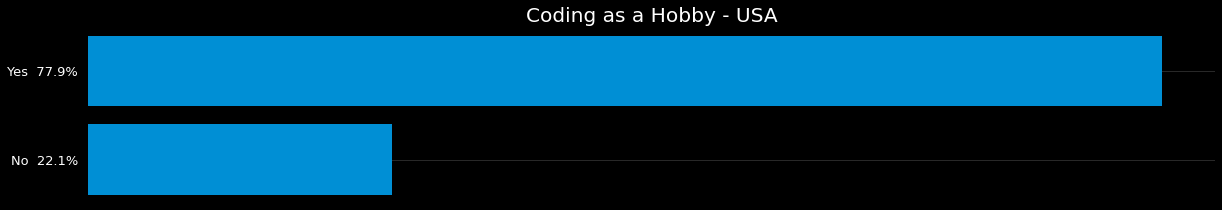

In [111]:
Hobbyist = data["Hobbyist"]         # We called necessary data
 
Hobbyist.dropna( inplace=True)      # We filter the data from NaN and empty spaces 

Hobbyist =data[(Hobbyist != "NaN") & (data["Country"] == "United States")]  # Data by specific country  (USA)

New_Hobbyist = Hobbyist["Hobbyist"]     # Save our new data into new variable



Dictionary_Distributor(New_Hobbyist , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,3), "Coding as a Hobby - USA")   # Building a schedule

####    Experience

<h5 style="text-align:center; " > <b>Years Since Learning to Code  </b></h1> 

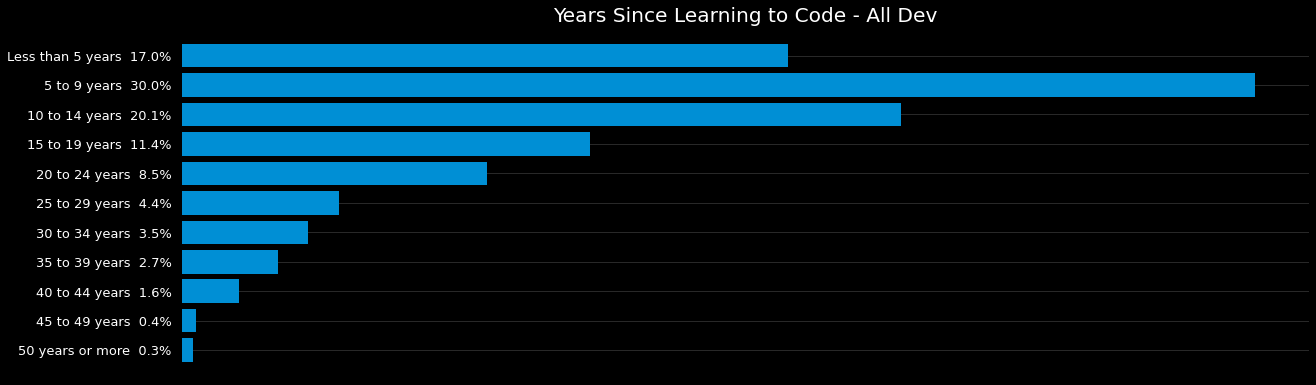

In [112]:
YearsCode = data["YearsCode"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_5(YearsCode)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, YearsCode ,"fivethirtyeight", False , (18,6), "Years Since Learning to Code - All Dev")  # Building a schedule

<h5 style="text-align:center; " > <b> Years Coding Professionally </b></h1> 

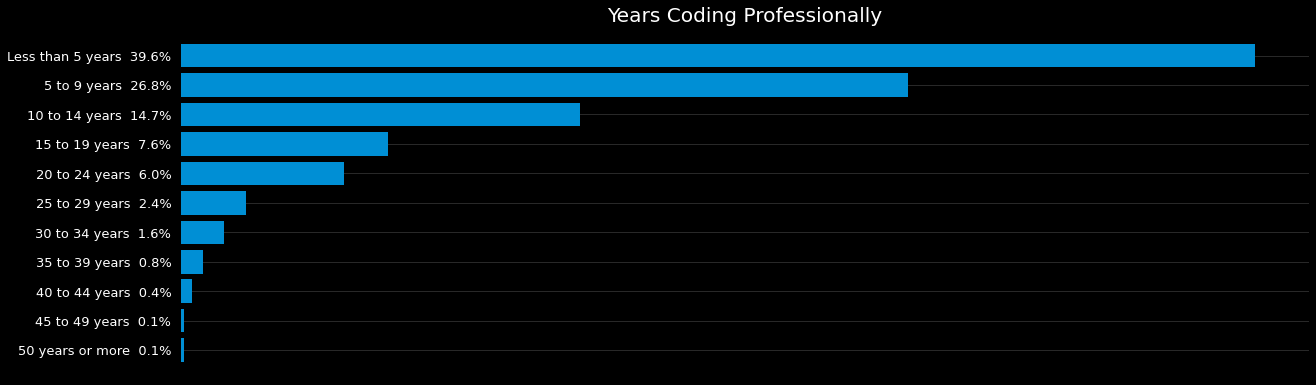

In [113]:
YearsCodePro = data["YearsCodePro"]       # We called necessary data
YearsCodePro=YearsCodePro.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_5(YearsCodePro)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, YearsCodePro ,"fivethirtyeight", False , (18,6), "Years Coding Professionally")  # Building a schedule

<h5 style="text-align:center; " > <b> Writing That First Line of Code </b></h1> 

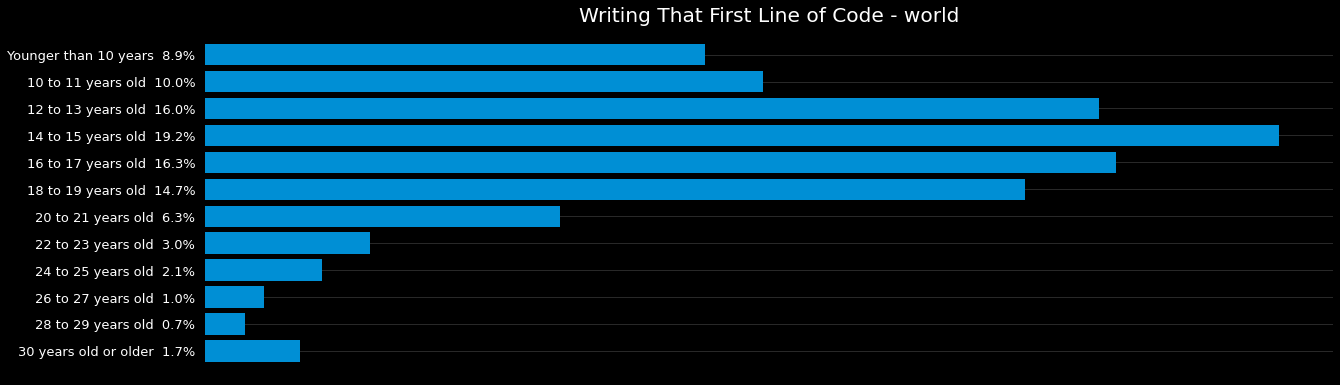

In [114]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_10(Age1stCode)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)


Build_Barh_sizes( key_Phrases , Quantity, Age1stCode ,"fivethirtyeight", False , (18,6), "Writing That First Line of Code - world")  # Building a schedule

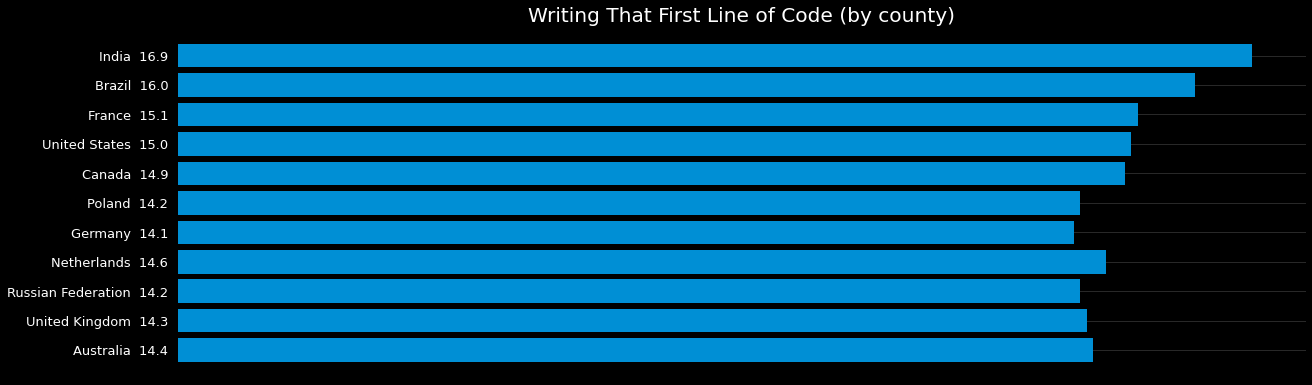

In [115]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(Age1stCode != "NaN") & (data["Country"] == i)] # Data by specific country  (from list)


    new_list = np.array(new_data["Age1stCode"])    
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # replace "Younger than 5 years" with 5
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # replace "Older than 85" with 85



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    

key_Phrases.reverse()   # reverse key_Phrases
Quantity.reverse()      # reverse Quantity

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,6), "Writing That First Line of Code (by county)")  # Building a schedule

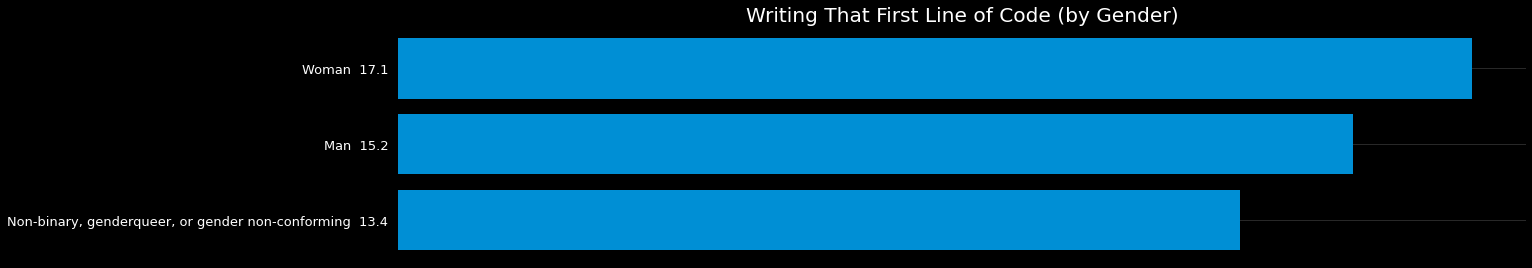

In [116]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Gender =  ["Woman" , "Man" , "Non-binary, genderqueer, or gender non-conforming"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Gender:

    new_data =data[(Age1stCode != "NaN") & (data["Gender"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["Age1stCode"])    
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # replace "Younger than 5 years" with 5
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # replace "Older than 85" with 85



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    

key_Phrases.reverse()   # reverse key_Phrases
Quantity.reverse()      # reverse Quantity

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,4), "Writing That First Line of Code (by Gender)")  # Building a schedule

####    Education

<h5 style="text-align:center; " > <b> Educational Attainment

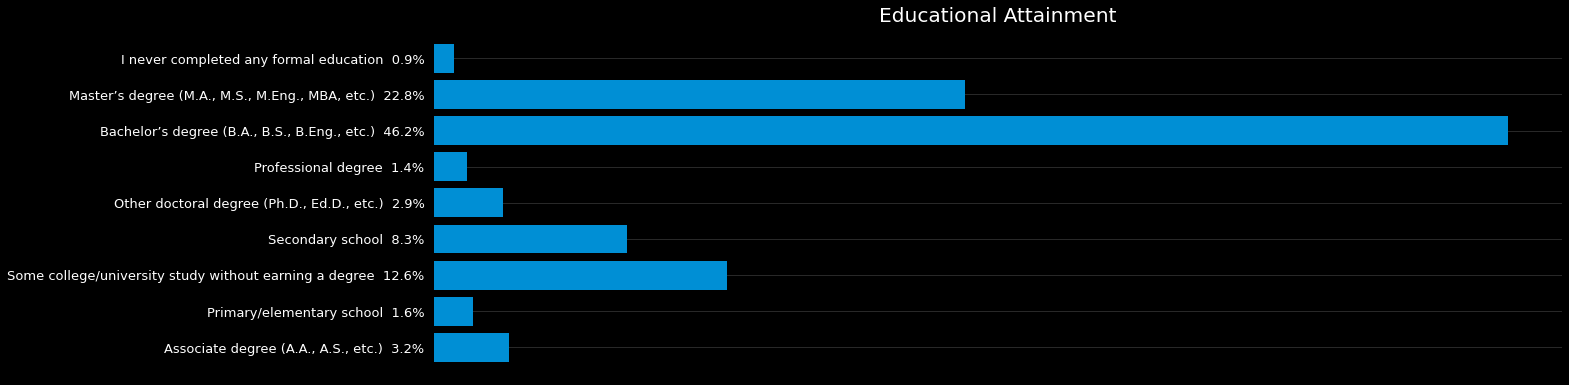

In [117]:
EdLevel = data["EdLevel"]     # We called necessary data

EdLevel = EdLevel.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # replace
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # replace 


Counted_EdLevel = Counter(EdLevel)  # Count information into EdLevel (where variable are replaced)

lCE = list(Counted_EdLevel.items())    # take items from dictinary

new_sorted_list = []    # new list were will be sorted answers


new_sorted_list.append(lCE[5])      # We sort the set
new_sorted_list.append(lCE[-2])     # We sort the set
new_sorted_list.append(lCE[4])      # We sort the set
new_sorted_list.append(lCE[2])      # We sort the set
new_sorted_list.append(lCE[-3])     # We sort the set
new_sorted_list.append(lCE[3])      # We sort the set
new_sorted_list.append(lCE[1])      # We sort the set
new_sorted_list.append(lCE[0])      # We sort the set
new_sorted_list.append(lCE[-1])     # We sort the set

new_sorted_list = dict(new_sorted_list)    # From list to Dictinary




key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable

for i in new_sorted_list:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(new_sorted_list[i])      # Add Quantity into Quantity' list


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,6), "Educational Attainment")  # Building a schedule


<h5 style="text-align:center; " > <b> Undergraduate Major

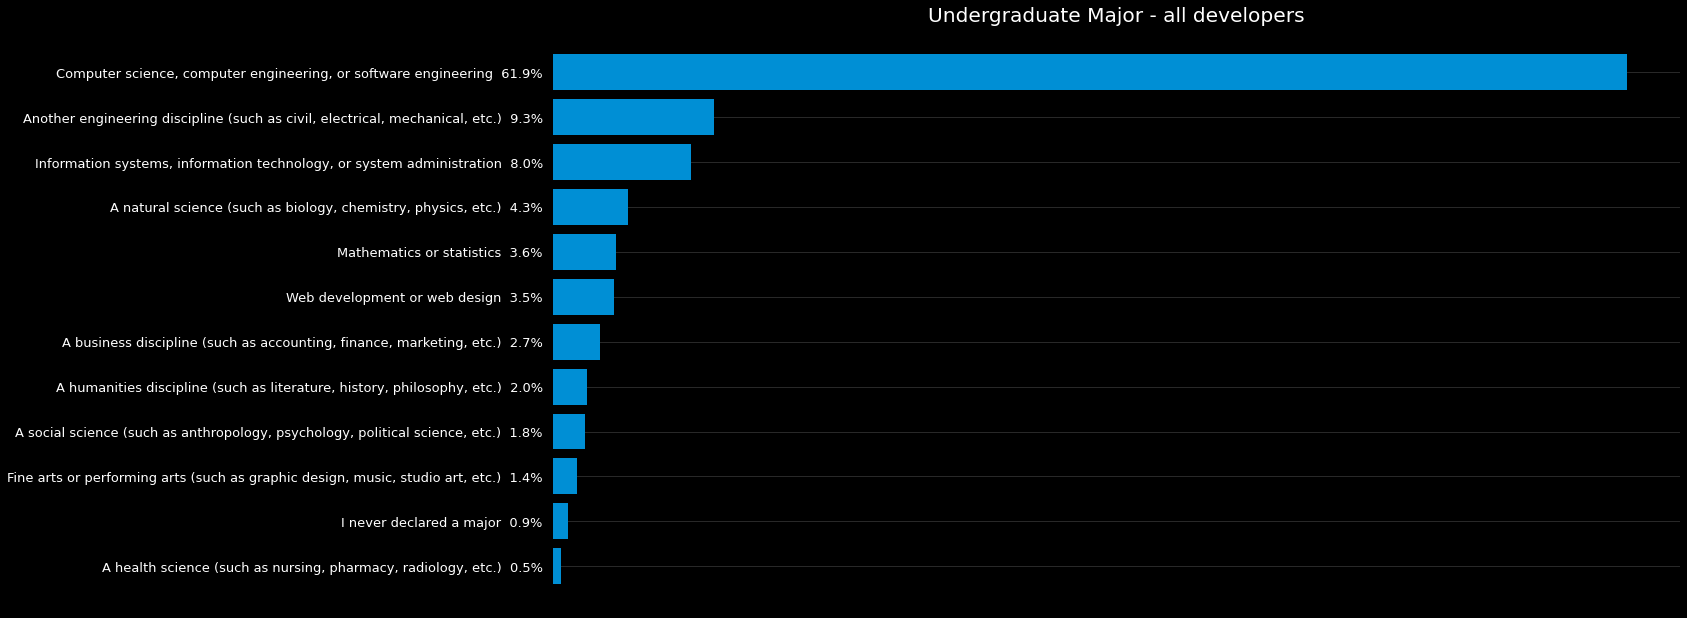

In [118]:
UndergradMajor = data["UndergradMajor"]     # We called necessary data

UndergradMajor = UndergradMajor.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(UndergradMajor , False)          # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,10), "Undergraduate Major - all developers")  # Building a schedule


<h5 style="text-align:center; " > <b> Formal Education Importance

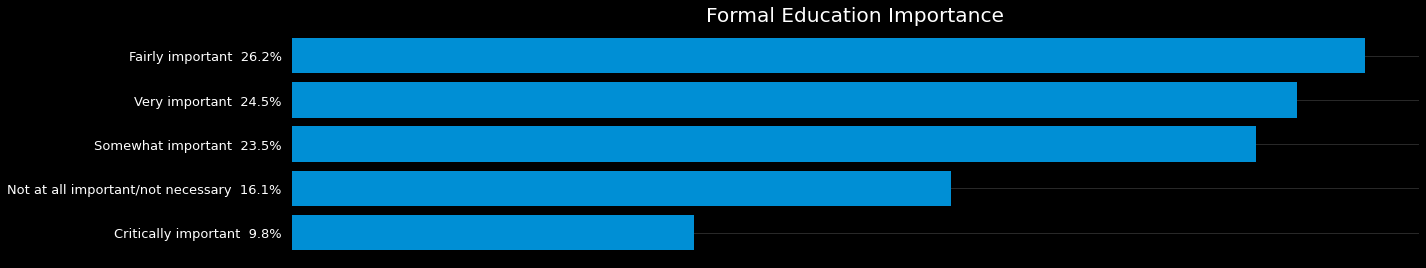

In [119]:
NEWEdImpt = data["NEWEdImpt"]       # We called necessary data
NEWEdImpt.dropna(inplace=True)      # We filter the data from NaN and empty spaces 



Dictionary_Distributor(NEWEdImpt , False)          # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, NEWEdImpt ,"fivethirtyeight", False , (18,4), "Formal Education Importance")  # Building a schedule



####    Demographics

<h5 style="text-align:center; " > <b> Race and Ethnicity

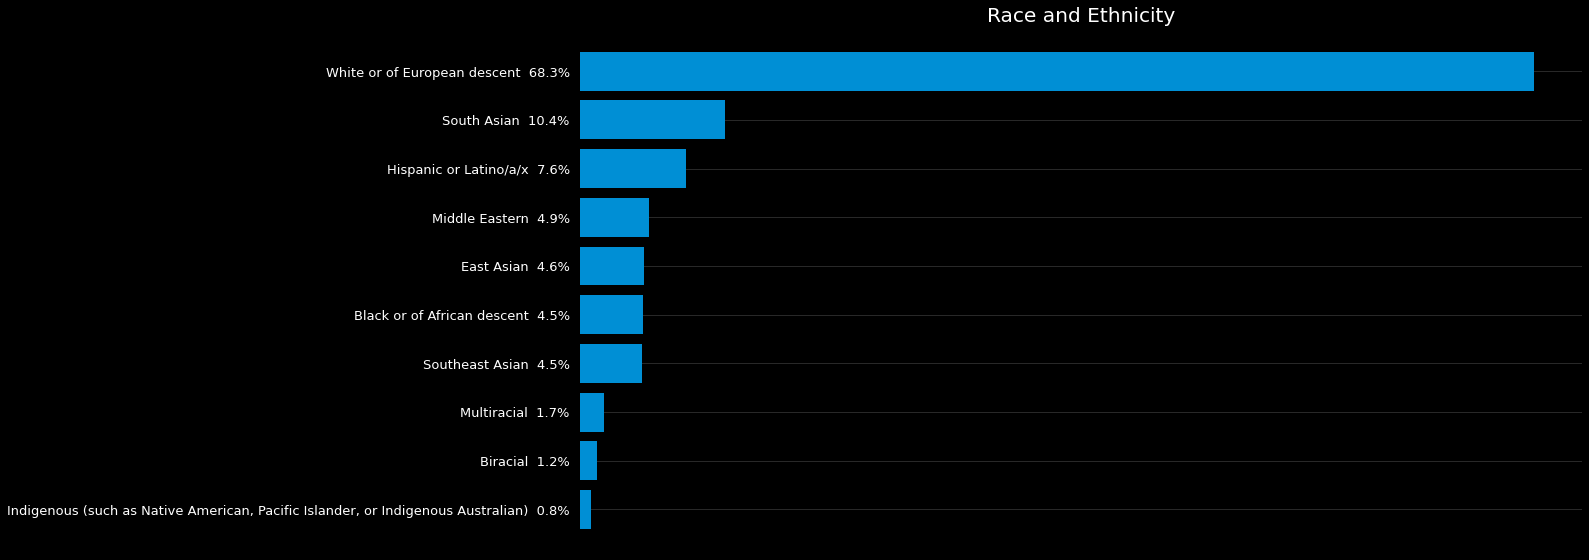

In [120]:
Ethnicity = data["Ethnicity"]    # We called necessary data
 
Ethnicity.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Ethnicity = Ethnicity.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Ethnicity , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (16,9), "Race and Ethnicity") # Building a schedule

<h5 style="text-align:center; " > <b> Gender

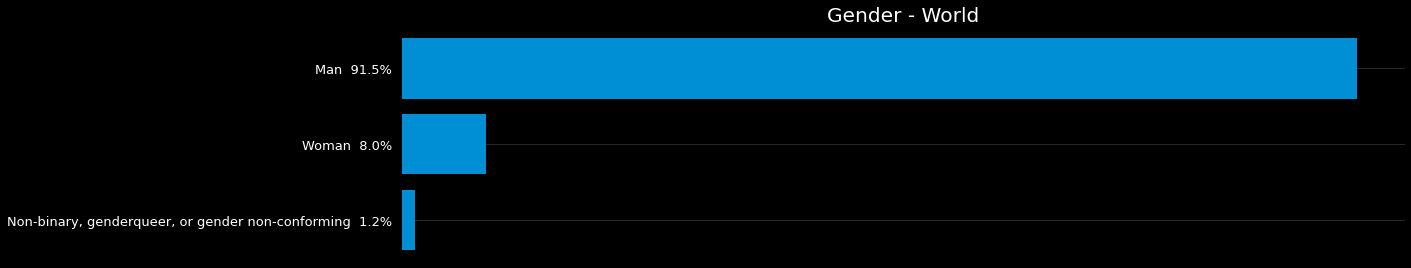

In [121]:
Gender = data["Gender"]    # We called necessary data
 
Gender.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Gender = Gender.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Gender , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (16,4), "Gender - World") # Building a schedule

<h5 style="text-align:center; " > <b> Transgender

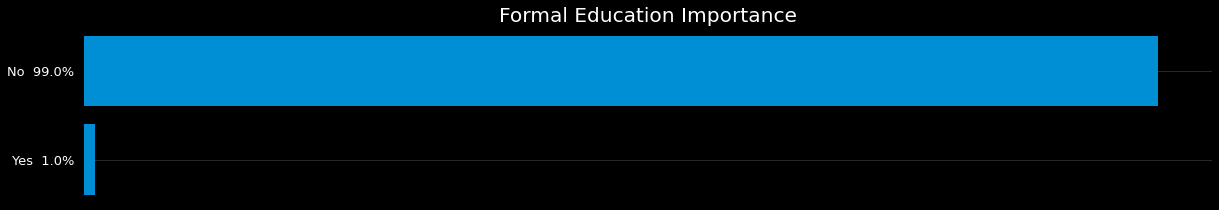

In [122]:
Trans = data["Trans"]       # We called necessary data
Trans.dropna(inplace=True)      # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Trans , False)          # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Trans ,"fivethirtyeight", False , (18,3), "Formal Education Importance")  # Building a schedule



<h5 style="text-align:center; " > <b> Experience and Gender

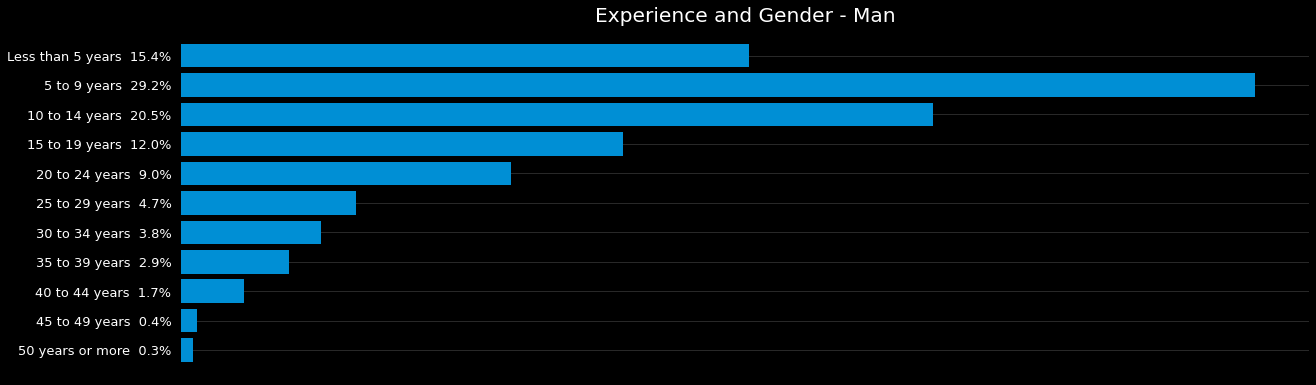

In [123]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,6), "Experience and Gender - Man")  # Building a schedule


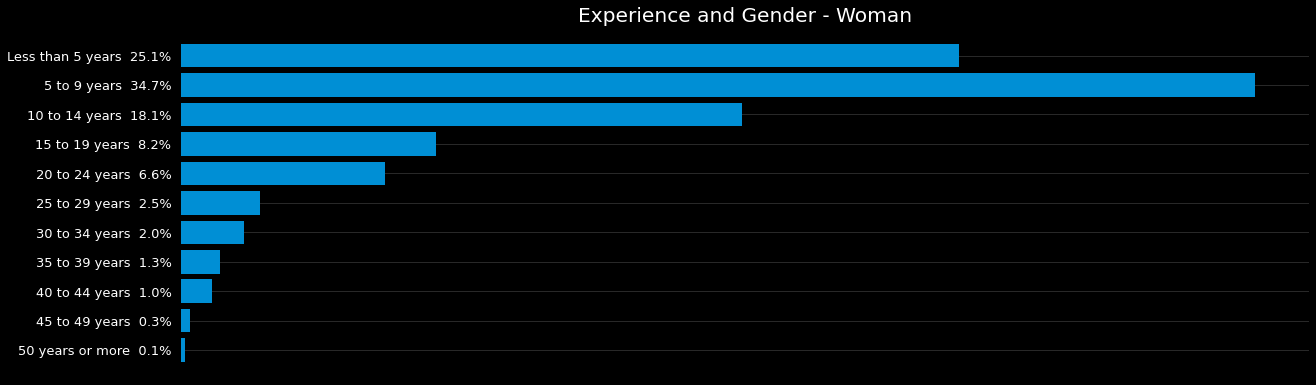

In [124]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))]  # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,6), "Experience and Gender - Woman")  # Building a schedule


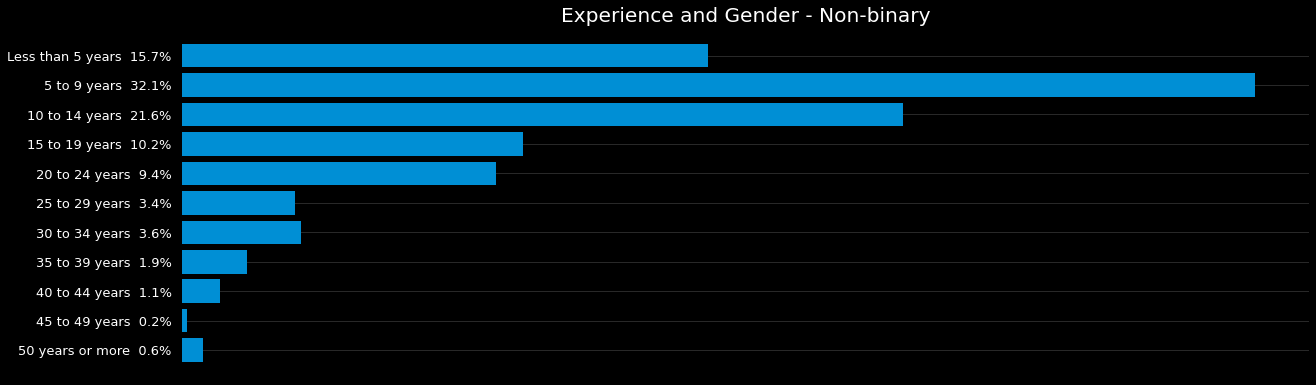

In [125]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))]   # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function

after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,6), "Experience and Gender - Non-binary")  # Building a schedule


<h5 style="text-align:center; " > <b> Sexual Orientation

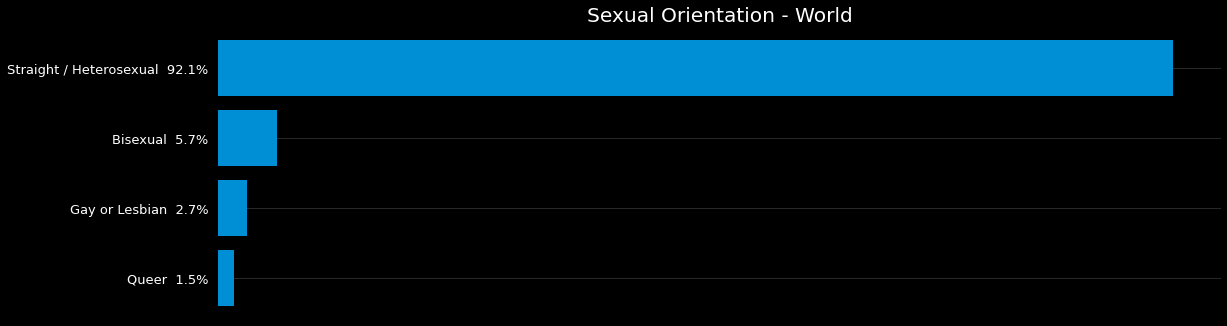

In [126]:
Sexuality = data["Sexuality"]    # We called necessary data
 
Sexuality.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Sexuality = Sexuality.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Sexuality , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (16,5), "Sexual Orientation - World") # Building a schedule

<h5 style="text-align:center; " > <b> Age

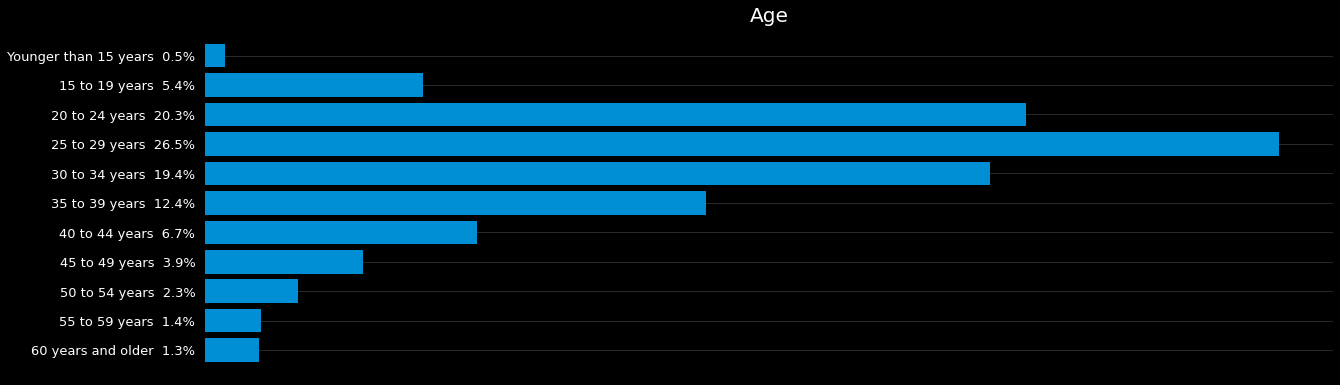

In [127]:
Age = data["Age"]   # We called necessary data
Age=Age.dropna()  # We filter the data from NaN and empty spaces 


Stacking_Less_than_15(Age)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)


Build_Barh_sizes( key_Phrases , Quantity, Age ,"fivethirtyeight", False , (18,6), "Age")  # Building a schedule


<h5 style="text-align:center; " > <b> Age and Experience by Country

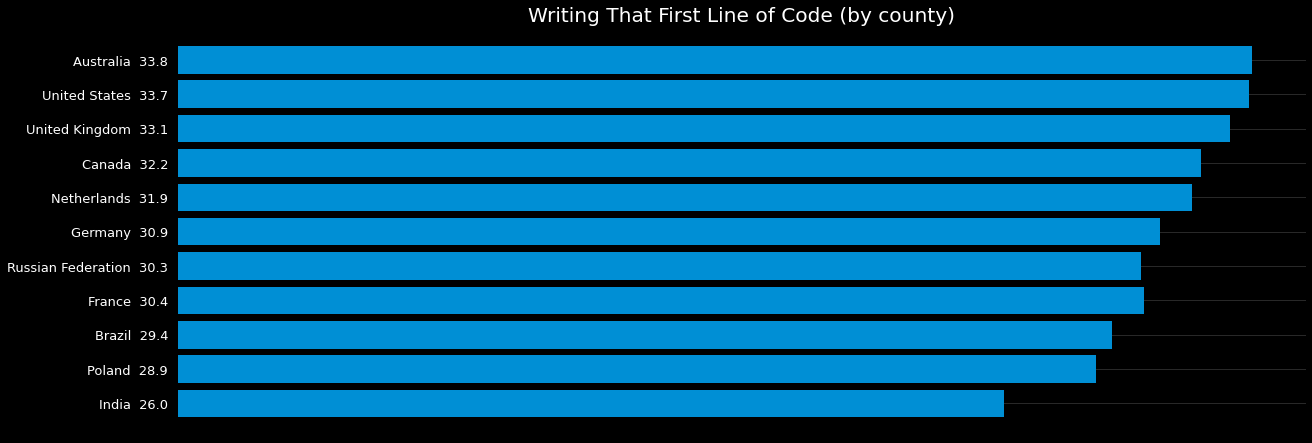

In [128]:
Age = data["Age"]       # We called necessary data
Age=Age.dropna()        # We filter the data from NaN and empty spaces 

Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(Age != "NaN") & (data["Country"] == i)] # Data by specific country  (from list)


    new_list = np.array(new_data["Age"])    

    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by county)")  # Building a schedule

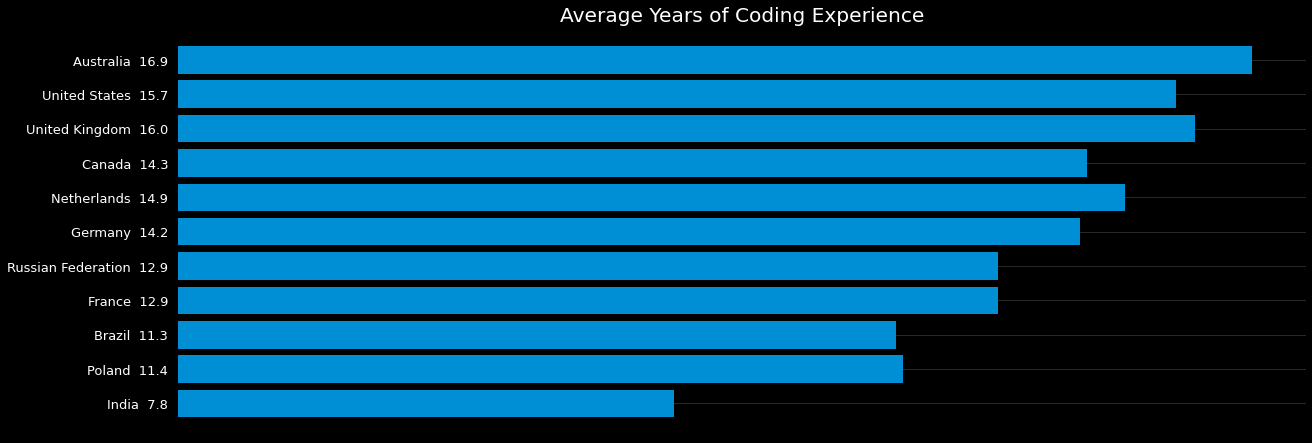

In [129]:
YearsCode = data["YearsCode"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 

Countries =  ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(YearsCode != "NaN") & (data["Country"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["YearsCode"])    
    new_list = np.where(new_list == "Less than 1 year", 1, new_list)  # replace "Less than 1 year" with 1
    new_list = np.where(new_list == "More than 50 years", 50, new_list)   # replace "More than 50 years" with 50



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Average Years of Coding Experience")  # Building a schedule

## Technology

#### Most Popular Technologies

<h5 style="text-align:center; " > <b> Programming, Scripting, and Markup Languages

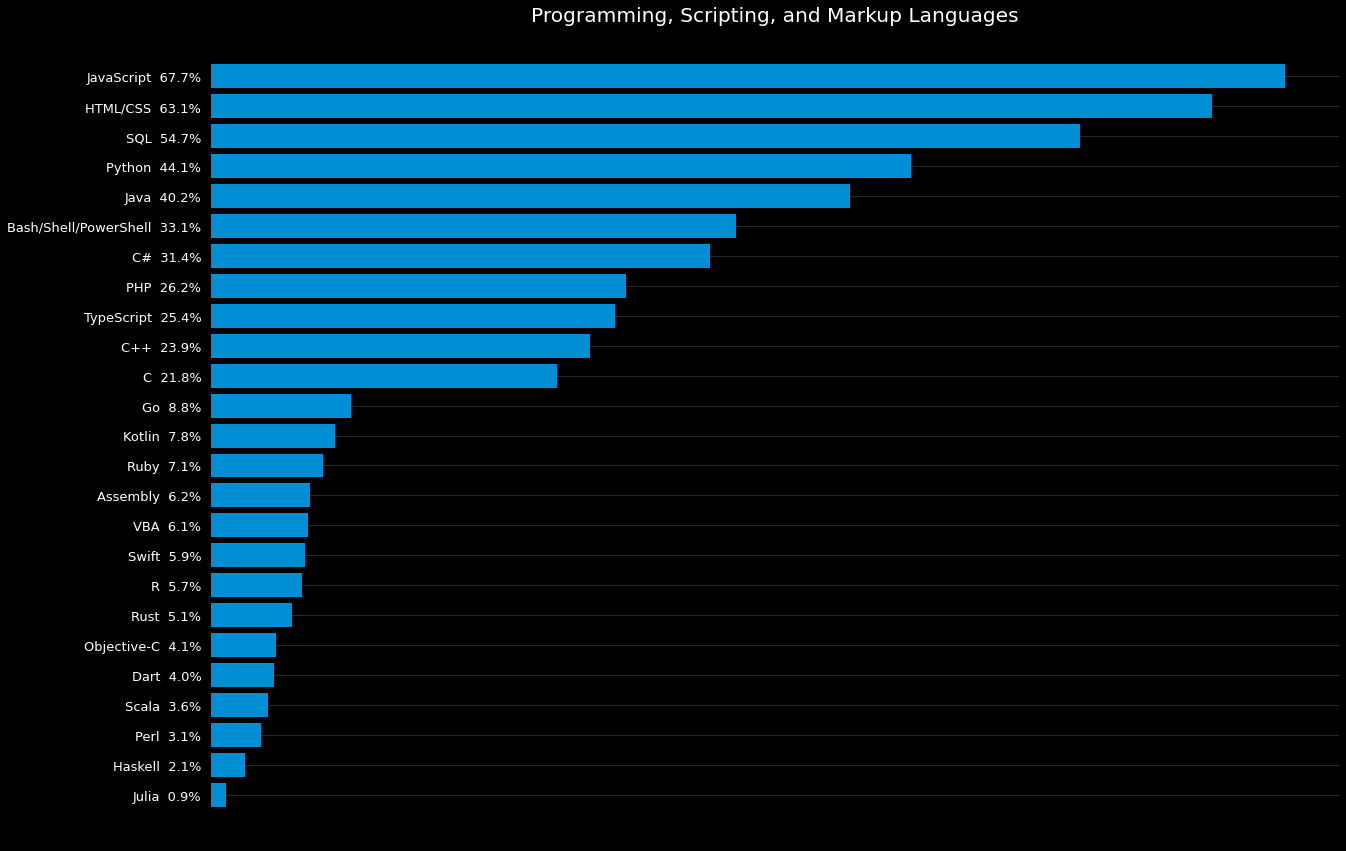

In [130]:
LanguageWorkedWith = data["LanguageWorkedWith"]   # We called necessary data

LanguageWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

LanguageWorkedWith = LanguageWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(LanguageWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith ,"fivethirtyeight", False , (18,14), "Programming, Scripting, and Markup Languages")  # Building a schedule


<h5 style="text-align:center; " > <b> Web Frameworks

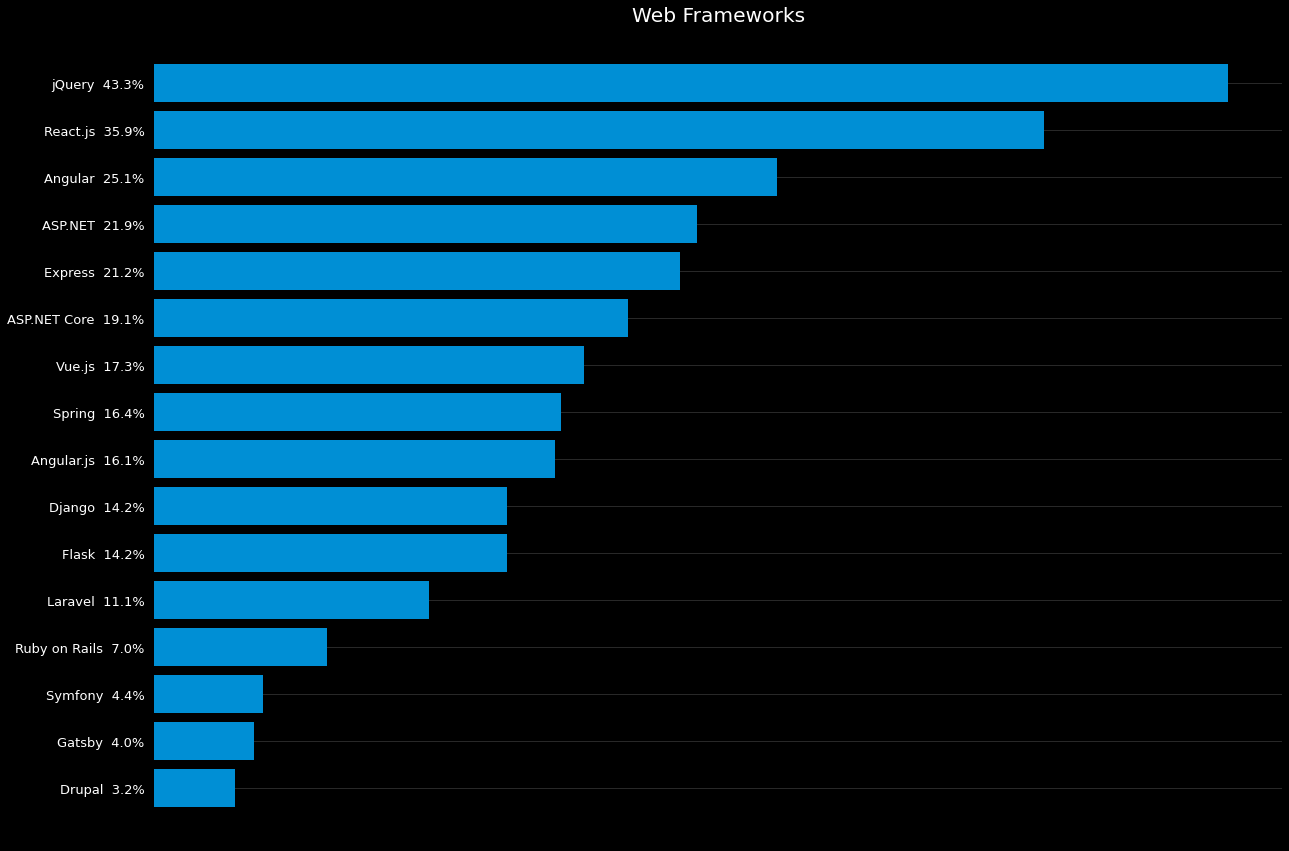

In [131]:
WebframeWorkedWith = data["WebframeWorkedWith"]   # We called necessary data

WebframeWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

WebframeWorkedWith = WebframeWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(WebframeWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, WebframeWorkedWith ,"fivethirtyeight", False , (18,14), "Web Frameworks")  # Building a schedule


<h5 style="text-align:center; " > <b> Other Frameworks, Libraries, and Tools

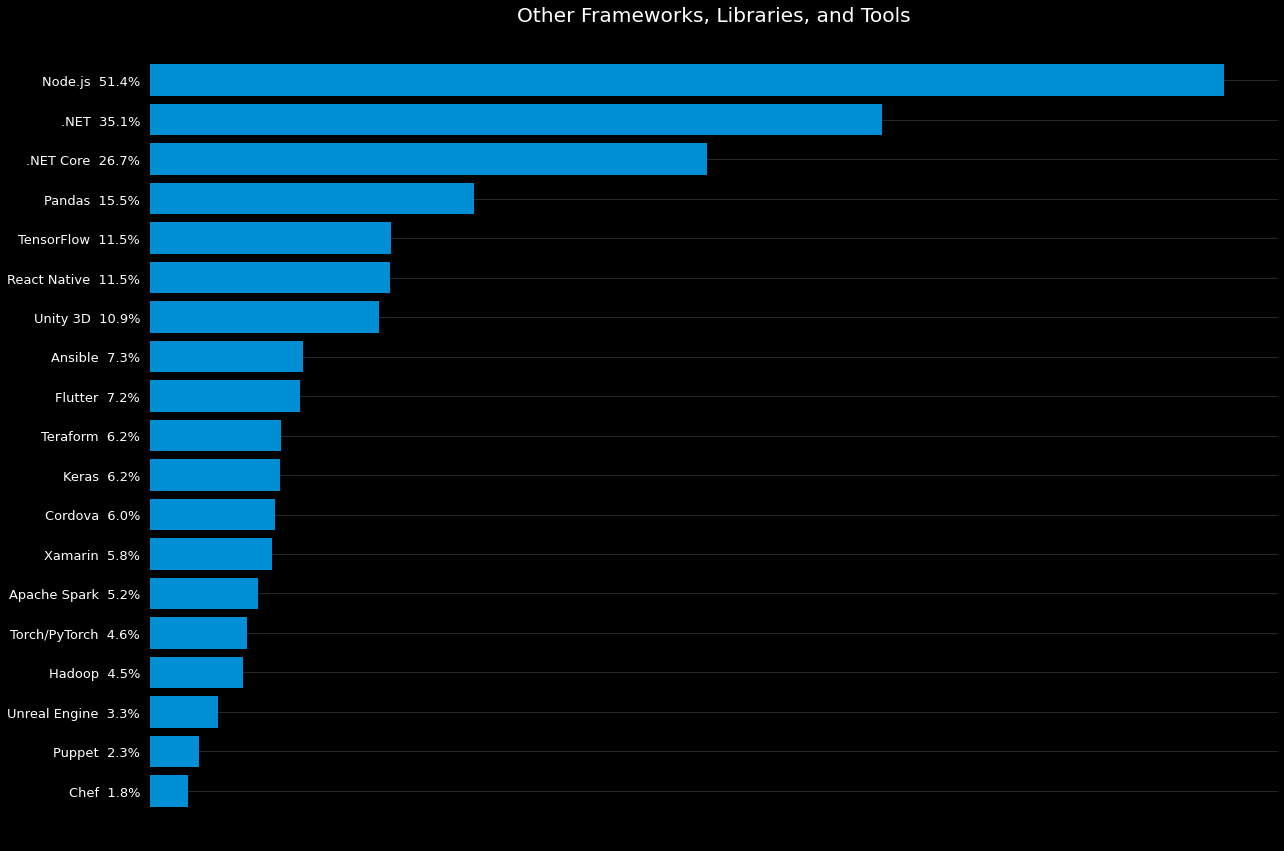

In [132]:
MiscTechWorkedWith = data["MiscTechWorkedWith"]   # We called necessary data

MiscTechWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

MiscTechWorkedWith = MiscTechWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(MiscTechWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, MiscTechWorkedWith ,"fivethirtyeight", False , (18,14), "Other Frameworks, Libraries, and Tools")  # Building a schedule

<h5 style="text-align:center; " > <b> Databases

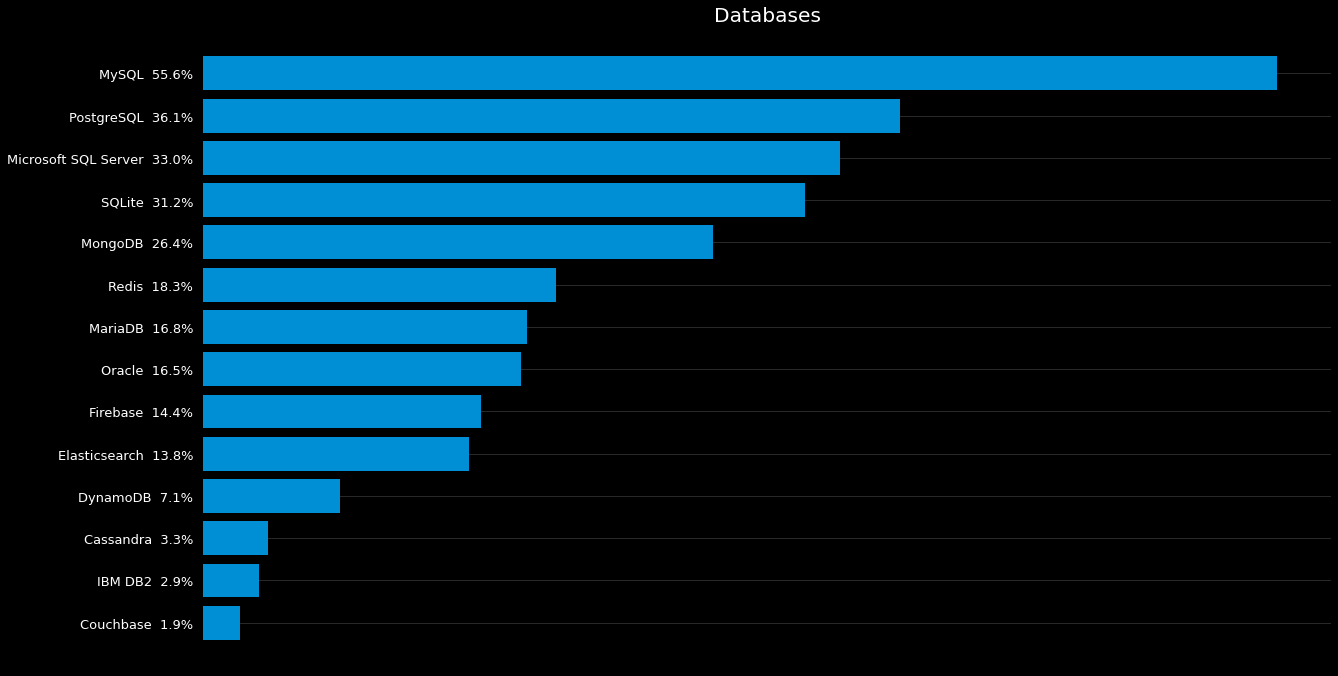

In [133]:
DatabaseWorkedWith = data["DatabaseWorkedWith"]   # We called necessary data

DatabaseWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

DatabaseWorkedWith = DatabaseWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(DatabaseWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith ,"fivethirtyeight", False , (18,11), "Databases")  # Building a schedule


<h5 style="text-align:center; " > <b> Platforms

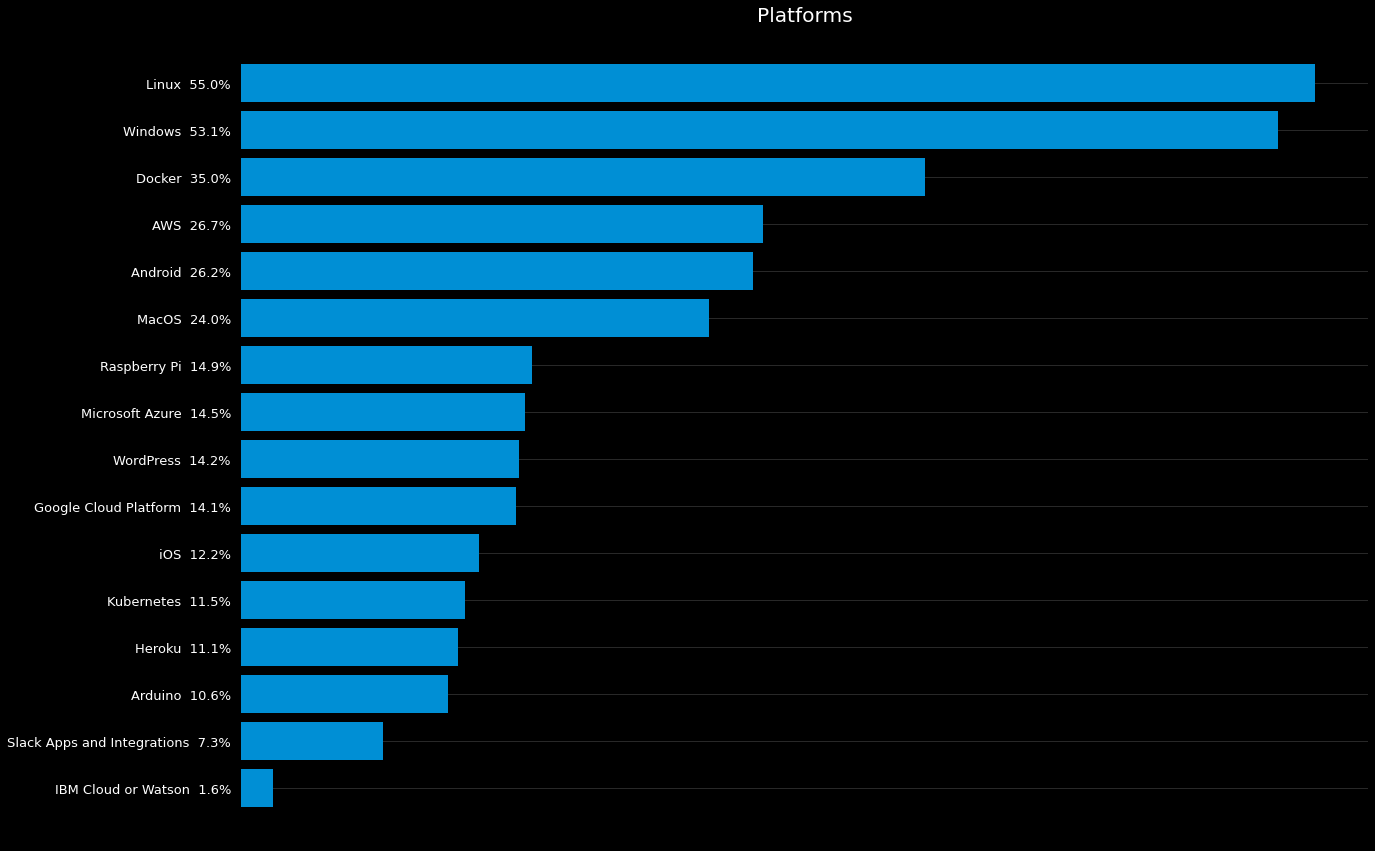

In [134]:
PlatformWorkedWith = data["PlatformWorkedWith"]   # We called necessary data

PlatformWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

PlatformWorkedWith = PlatformWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(PlatformWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith ,"fivethirtyeight", False , (18,14), "Platforms")  # Building a schedule


####  Development Environments and Tools

<h5 style="text-align:center; " > <b> Developers' Primary Operating Systems

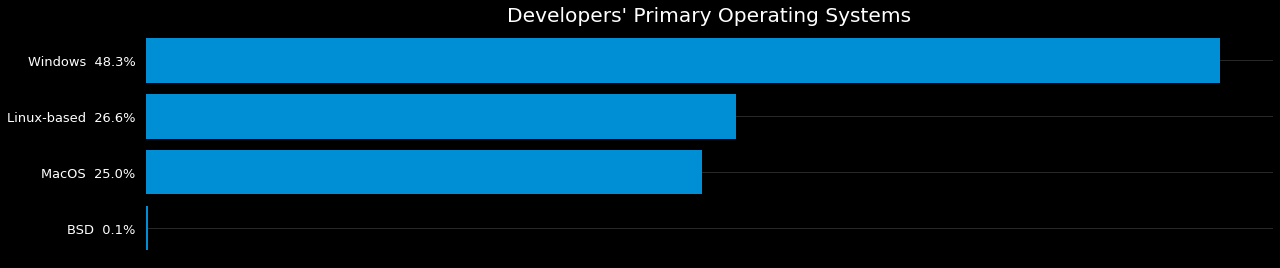

In [135]:
OpSys = data["OpSys"]   # We called necessary data

OpSys.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

OpSys = OpSys.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(OpSys , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (18,4), "Developers' Primary Operating Systems")  # Building a schedule


<h5 style="text-align:center; " > <b> Using Containers

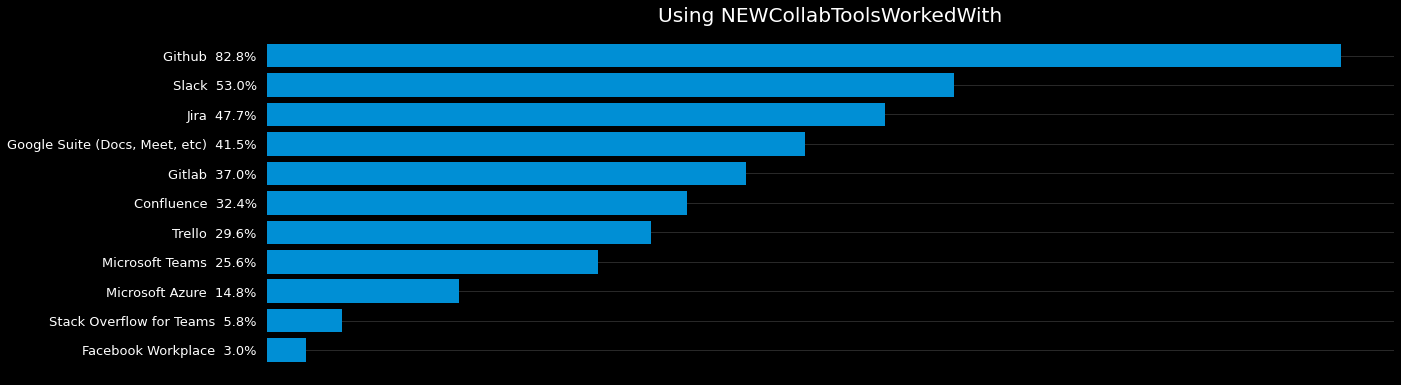

In [136]:
NEWCollabToolsWorkedWith = data["NEWCollabToolsWorkedWith"]   # We called necessary data

NEWCollabToolsWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

NEWCollabToolsWorkedWith = NEWCollabToolsWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(NEWCollabToolsWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, NEWCollabToolsWorkedWith ,"fivethirtyeight", False , (18,6), "Using NEWCollabToolsWorkedWith")  # Building a schedule


<h5 style="text-align:center; " > <b> Researching tools

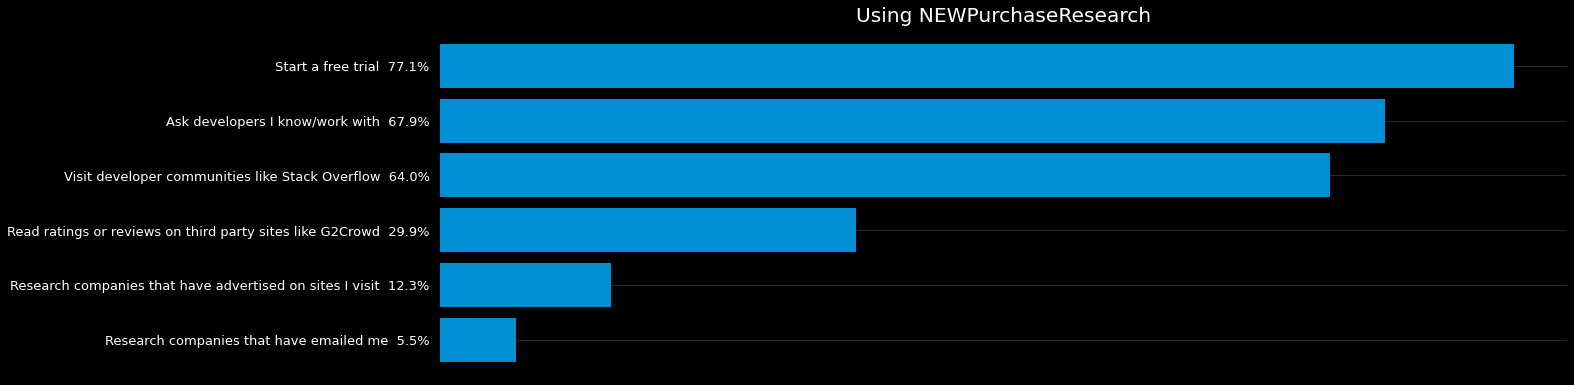

In [137]:
NEWPurchaseResearch = data["NEWPurchaseResearch"]   # We called necessary data

NEWPurchaseResearch.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

NEWPurchaseResearch = NEWPurchaseResearch.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(NEWPurchaseResearch , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, NEWPurchaseResearch ,"fivethirtyeight", False , (18,6), "Using NEWPurchaseResearch")  # Building a schedule


<h5 style="text-align:center; " > <b> Purchase Influence


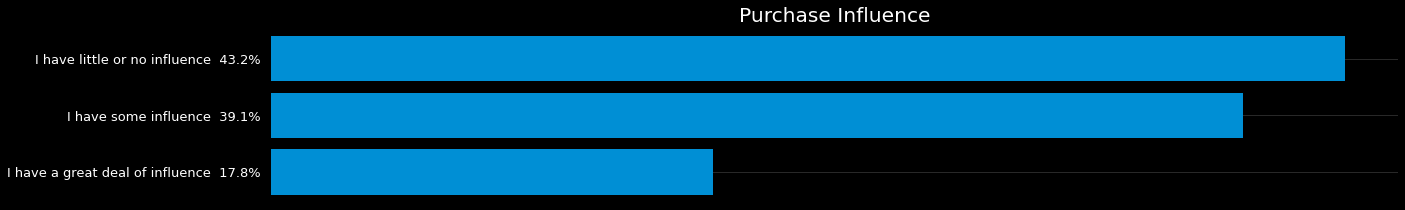

In [138]:
PurchaseWhat = data["PurchaseWhat"]   # We called necessary data

PurchaseWhat.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

PurchaseWhat = PurchaseWhat.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(PurchaseWhat , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, PurchaseWhat ,"fivethirtyeight", False , (18,3), "Purchase Influence")  # Building a schedule


####    Learning & Problem Solving

<h5 style="text-align:center; " > <b>Learning new tech frequency

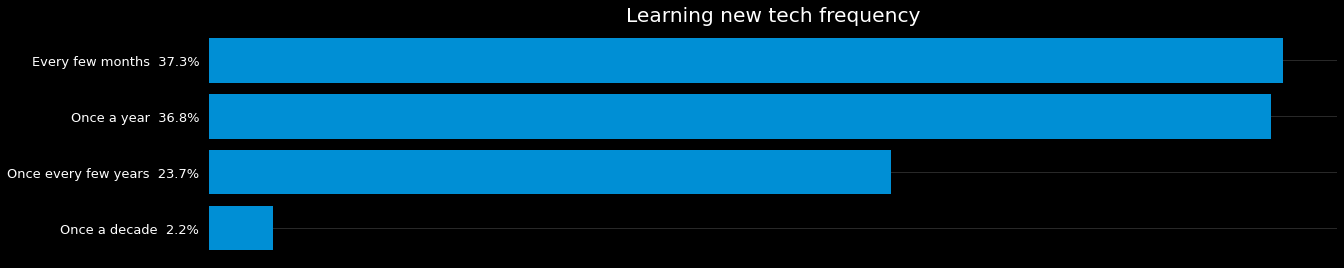

In [139]:
NEWLearn = data["NEWLearn"]   # We called necessary data

NEWLearn.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

NEWLearn = NEWLearn.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(NEWLearn , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, NEWLearn ,"fivethirtyeight", False , (18,4), "Learning new tech frequency")  # Building a schedule


<h5 style="text-align:center; " > <b>   What do you do when you get stuck

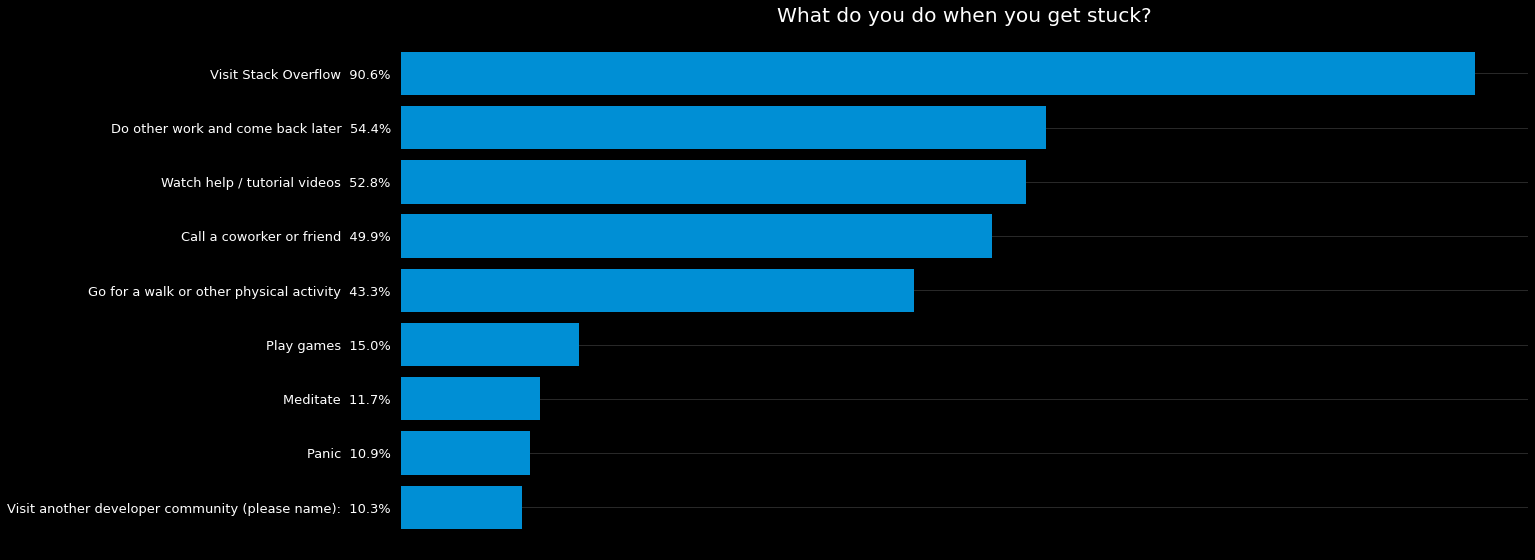

In [140]:
NEWStuck = data["NEWStuck"]   # We called necessary data

NEWStuck.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

NEWStuck = NEWStuck.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(NEWStuck , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, NEWStuck ,"fivethirtyeight", False , (18,9), "What do you do when you get stuck?")  # Building a schedule


<h5 style="text-align:center; " > <b> Already Visited Feeling </b></h1> 

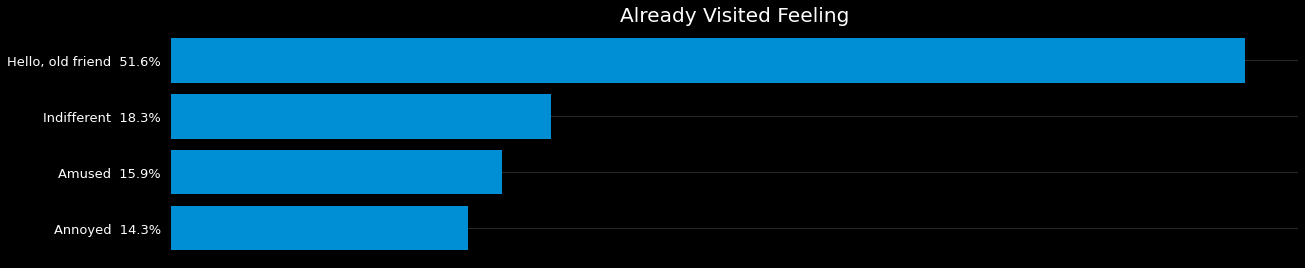

In [141]:
NEWPurpleLink = data["NEWPurpleLink"]   # We called necessary data

NEWPurpleLink.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

NEWPurpleLink = NEWPurpleLink.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(NEWPurpleLink , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, NEWPurpleLink ,"fivethirtyeight", False , (18,4), "Already Visited Feeling")  # Building a schedule

## Work

####  Employment

<h5 style="text-align:center; " > <b> Employment Status </b></h1>

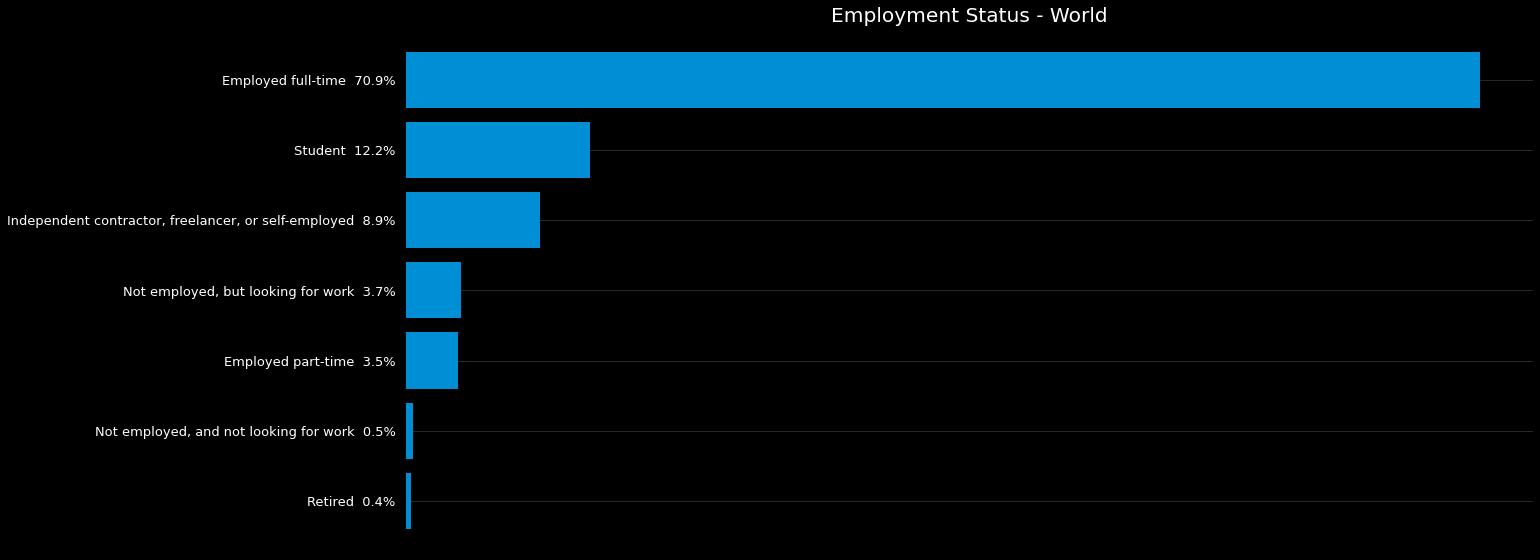

In [142]:
Employment = data['Employment']

Employment.dropna(inplace=True)


Dictionary_Distributor(Employment, False)


Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (18,9), "Employment Status - World")  # Building a schedule



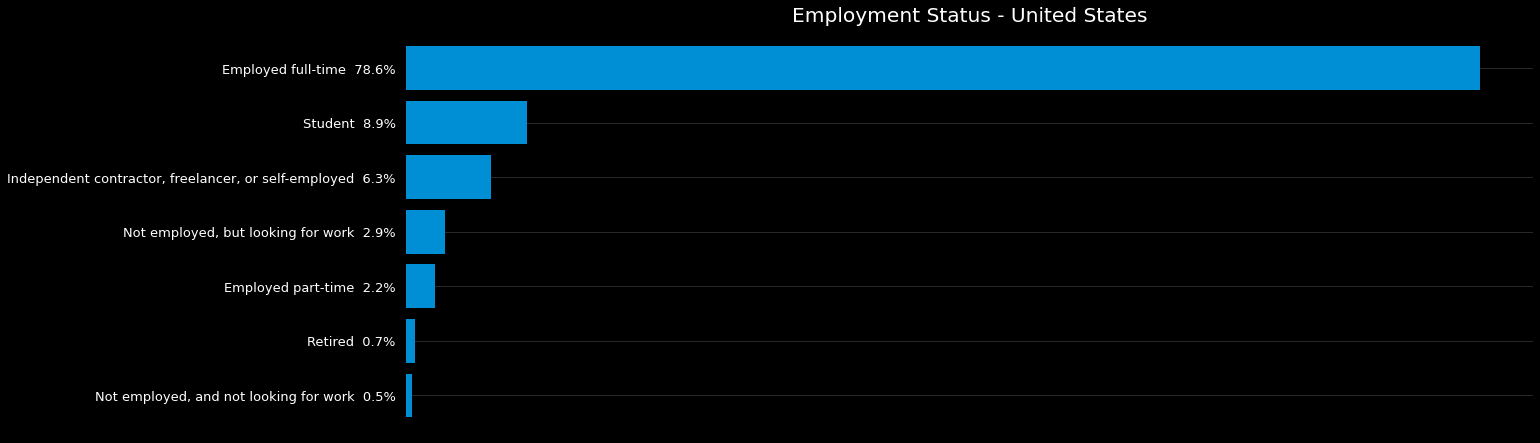

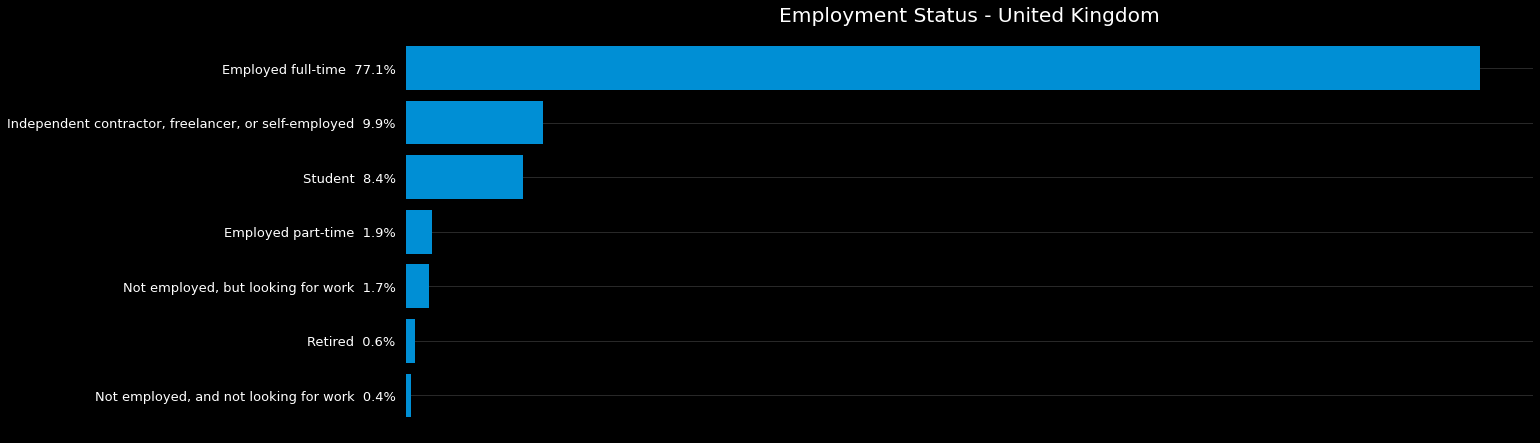

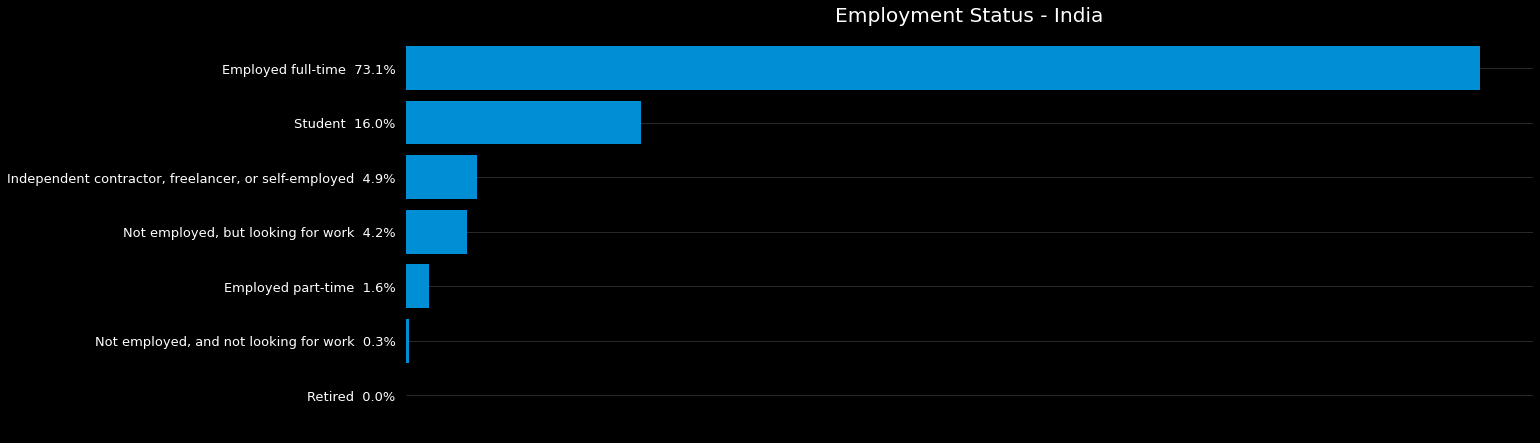

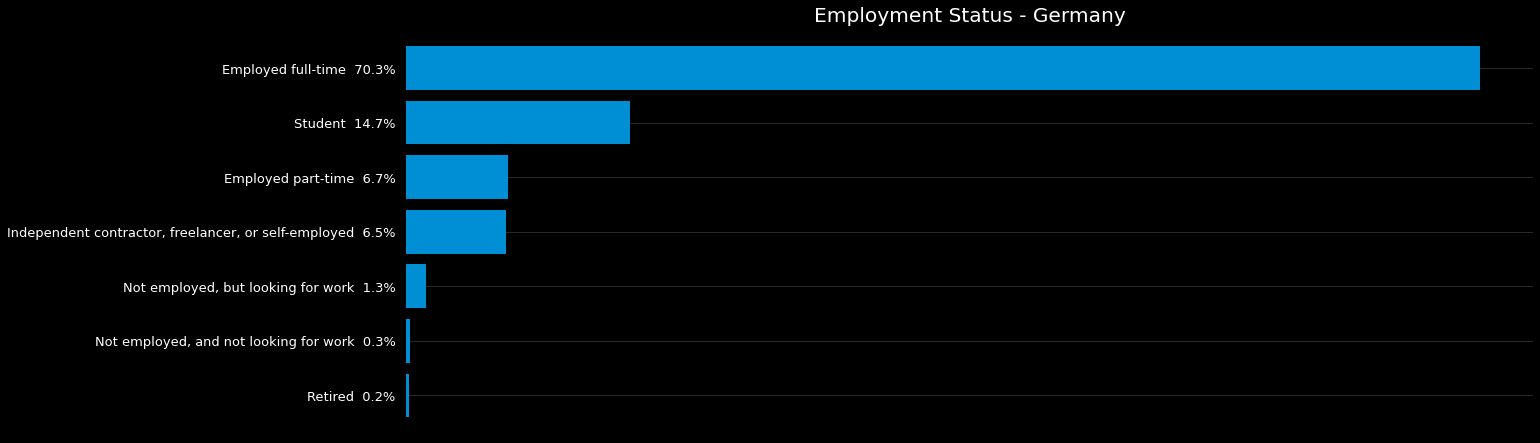

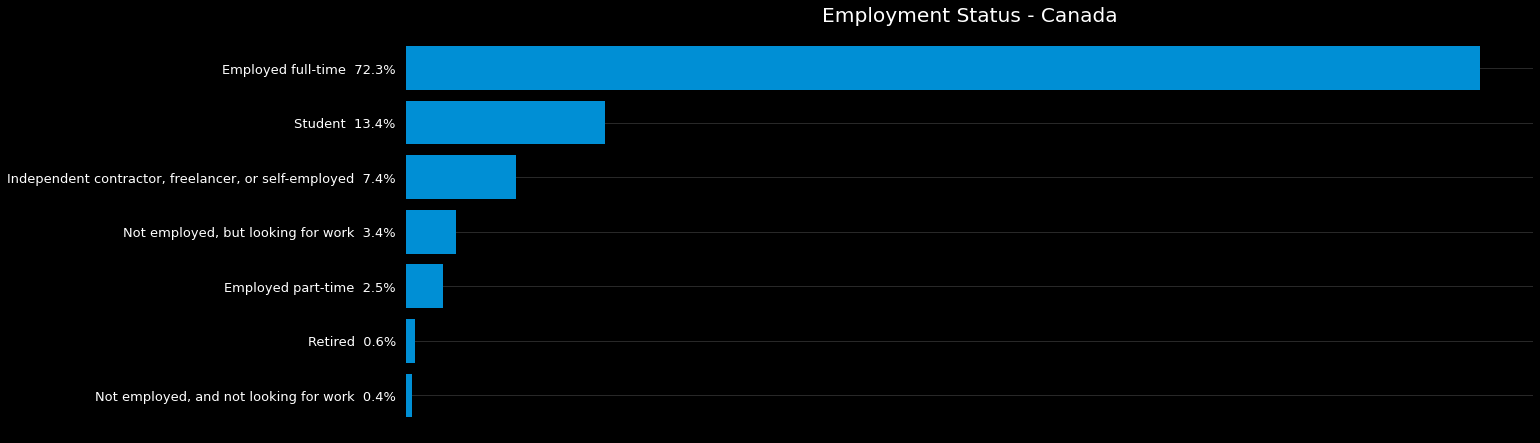

In [143]:
Employment = data["Employment"]
Employment.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_Employment = data[ (Employment != "NaN")   &  ( data["Country"] == i ) ]

    new_Employment = new_Employment ["Employment"]


    Dictionary_Distributor(new_Employment , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_Employment ,"fivethirtyeight", False , (18,7), "Employment Status - " + i)  # Building a schedule

<h5 style="text-align:center; " > <b> Overtime </b></h1> 

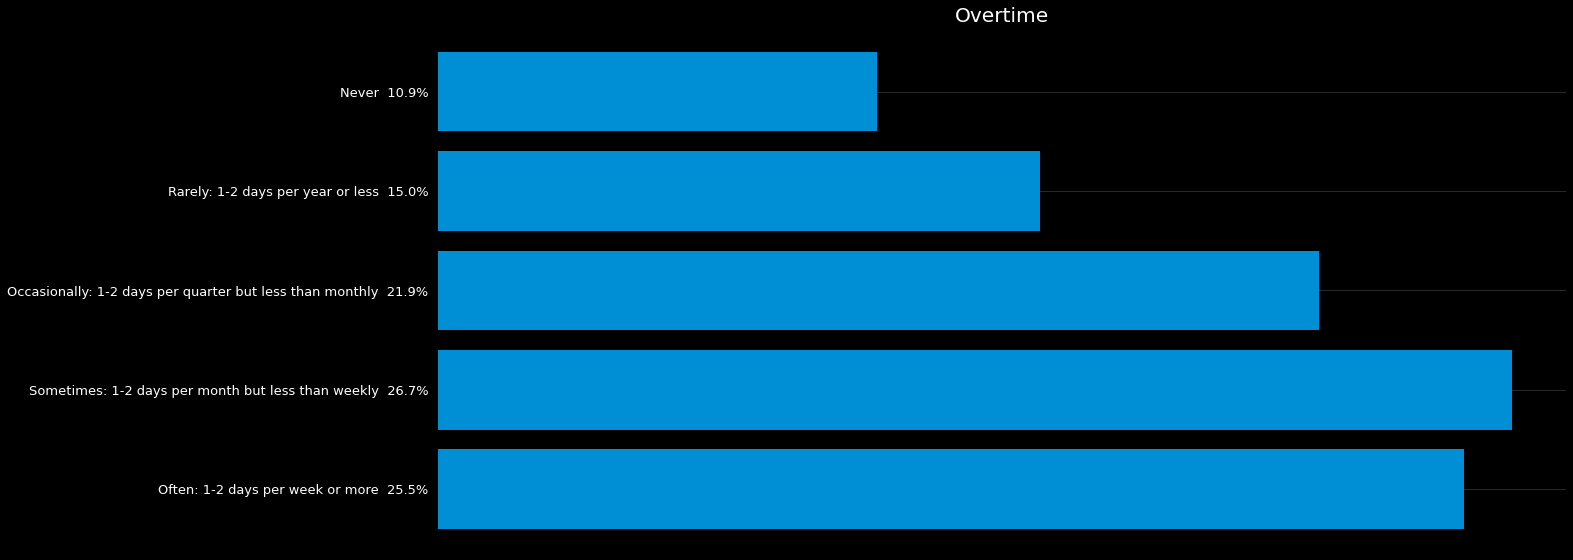

In [144]:
NEWOvertime = data['NEWOvertime']

NEWOvertime.dropna(inplace=True)

NEWOvertime_Counted = Counter(NEWOvertime)


key_Phrases = ['Never' ,'Rarely: 1-2 days per year or less', 'Occasionally: 1-2 days per quarter but less than monthly' ,'Sometimes: 1-2 days per month but less than weekly','Often: 1-2 days per week or more']
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(NEWOvertime_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, NEWOvertime ,"fivethirtyeight", False , (18,9), "Overtime")  # Building a schedule



#### Company Information

<h5 style="text-align:center; " > <b> Company Size </b></h1> 

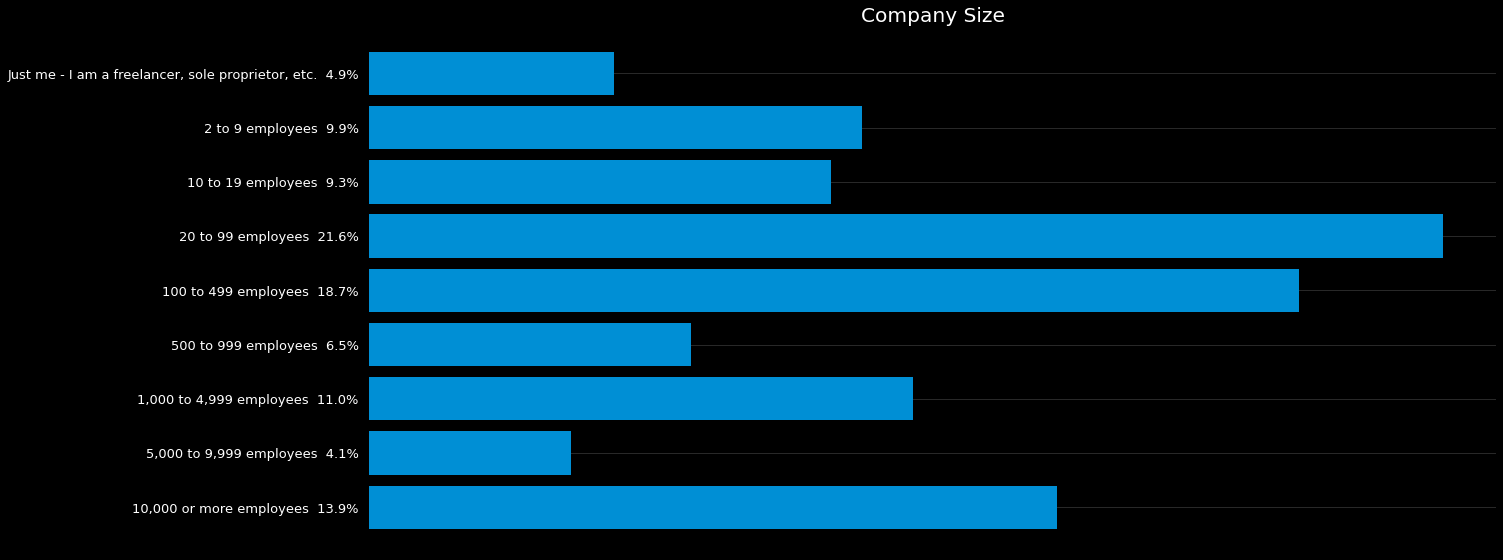

In [145]:
OrgSize = data['OrgSize']

OrgSize.dropna(inplace=True)

OrgSize_Counted = Counter(OrgSize)


key_Phrases = ['Just me - I am a freelancer, sole proprietor, etc.' ,'2 to 9 employees', '10 to 19 employees' ,'20 to 99 employees','100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees',]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(OrgSize_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (18,9), "Company Size")  # Building a schedule



<h5 style="text-align:center; " > <b> Onboarding </b></h1> 

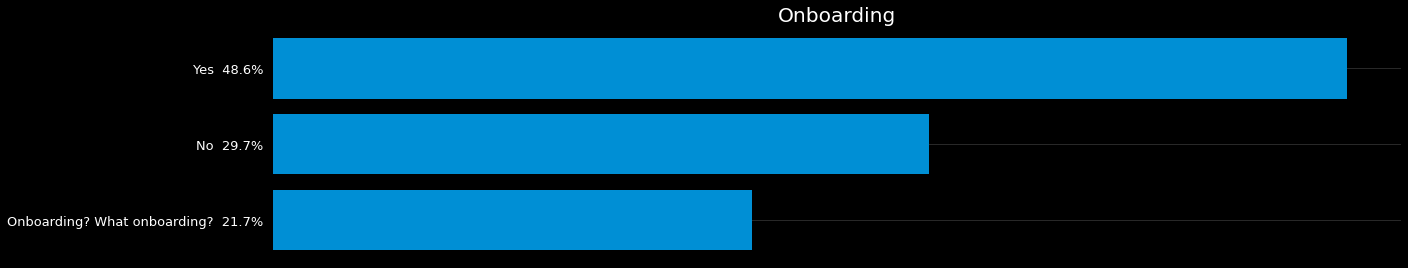

In [146]:
NEWOnboardGood = data["NEWOnboardGood"]
NEWOnboardGood.dropna(inplace=True)


Dictionary_Distributor(NEWOnboardGood , False)
Build_Barh_sizes( key_Phrases , Quantity, NEWOnboardGood ,"fivethirtyeight", False , (18,4), "Onboarding")  # Building a schedule


<h5 style="text-align:center; " > <b> Presence of DevOps Personnel </b></h1>

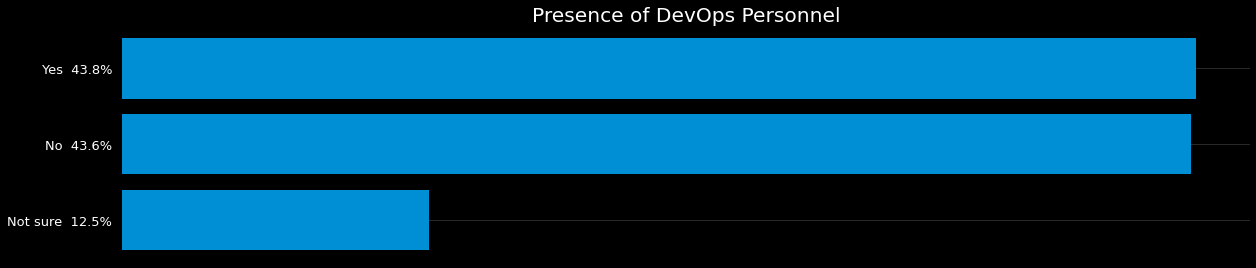

In [147]:
NEWDevOps = data["NEWDevOps"]
NEWDevOps.dropna(inplace=True)


Dictionary_Distributor(NEWDevOps , False)
Build_Barh_sizes( key_Phrases , Quantity, NEWDevOps ,"fivethirtyeight", False , (18,4), "Presence of DevOps Personnel")  # Building a schedule


<h5 style="text-align:center; " > <b> Importance of DevOps </b></h1> 

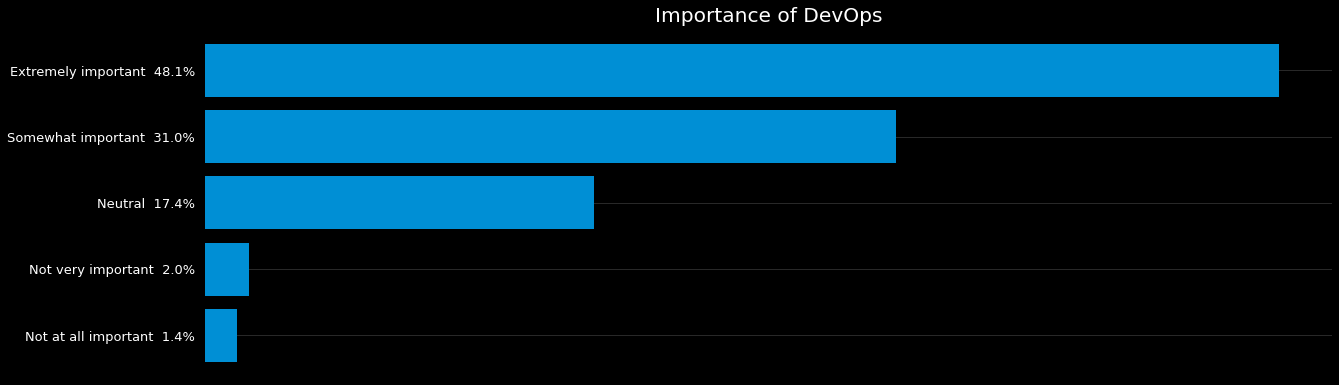

In [148]:
NEWDevOpsImpt = data["NEWDevOpsImpt"]
NEWDevOpsImpt.dropna(inplace=True)


Dictionary_Distributor(NEWDevOpsImpt , False)
Build_Barh_sizes( key_Phrases , Quantity, NEWDevOpsImpt ,"fivethirtyeight", False , (18,6), "Importance of DevOps")  # Building a schedule


#### Career Values


<h5 style="text-align:center; " > <b> Carrer satisficaton </b></h1>

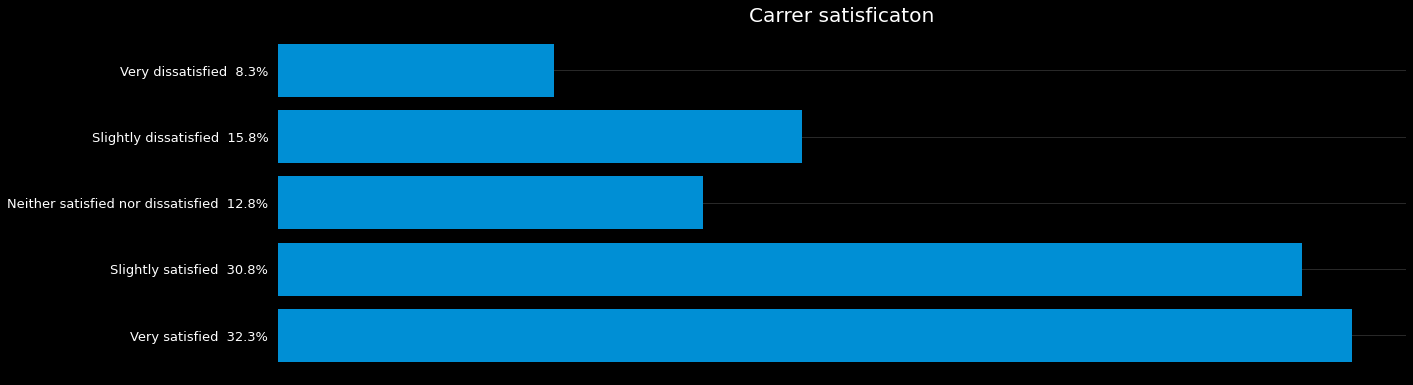

In [149]:
JobSat = data["JobSat"]
JobSat.dropna(inplace=True)

JobSat_Counted = Counter(JobSat)

key_Phrases = ['Very dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Very satisfied' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(JobSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (18,6), "Carrer satisficaton")  # Building a schedule



#### Looking for a Job

<h5 style="text-align:center; " > <b> Job Search Status </b></h1> 

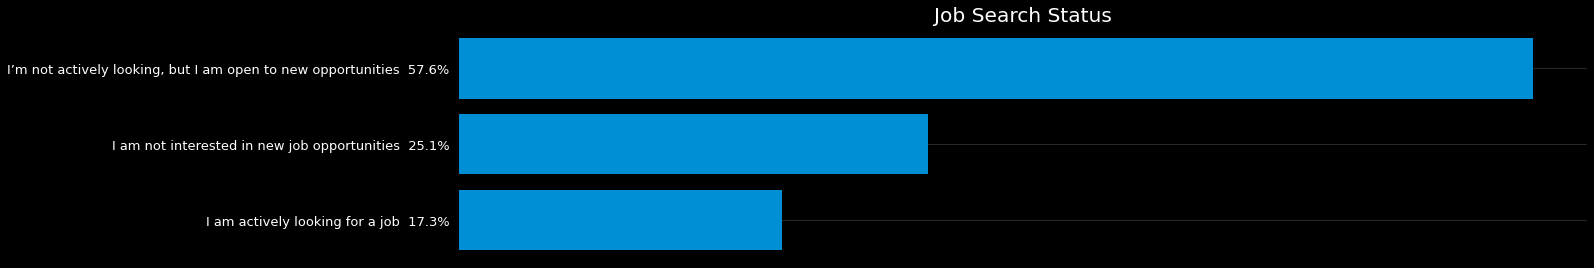

In [150]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Dictionary_Distributor(JobSeek , False)

Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (18,4), "Job Search Status")  # Building a schedule


<h5 style="text-align:center; " > <b> Job Search Status by Geography </b></h1> 

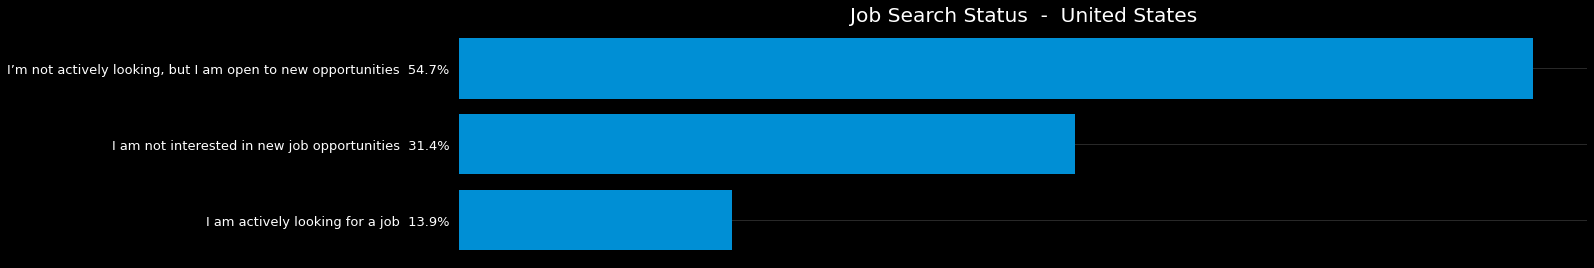

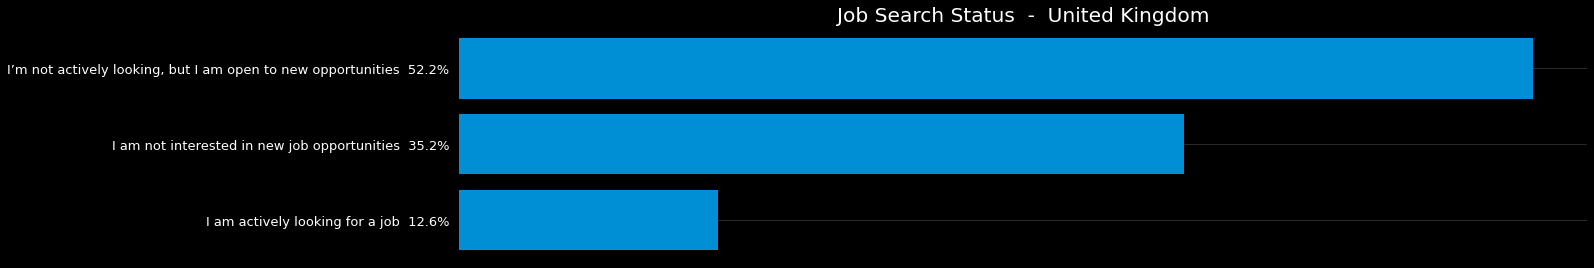

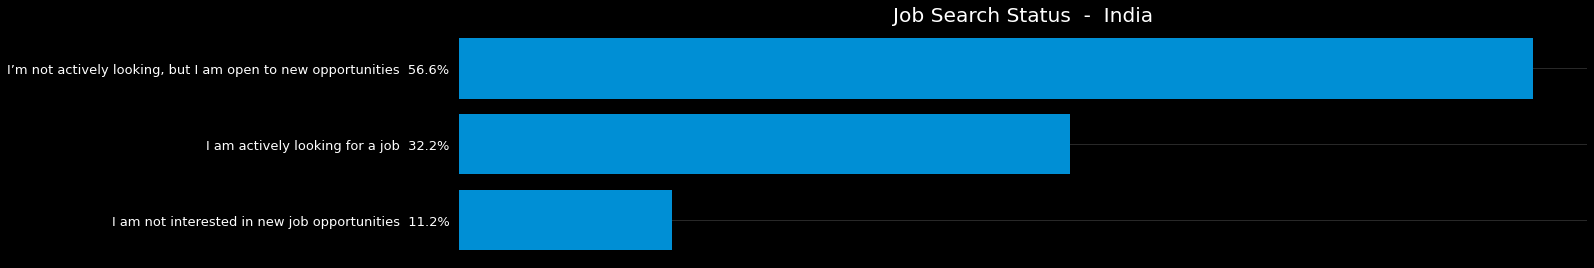

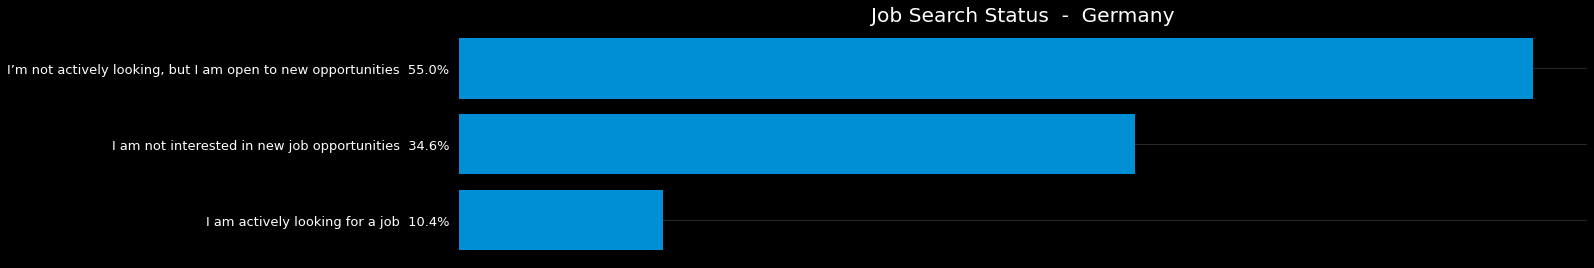

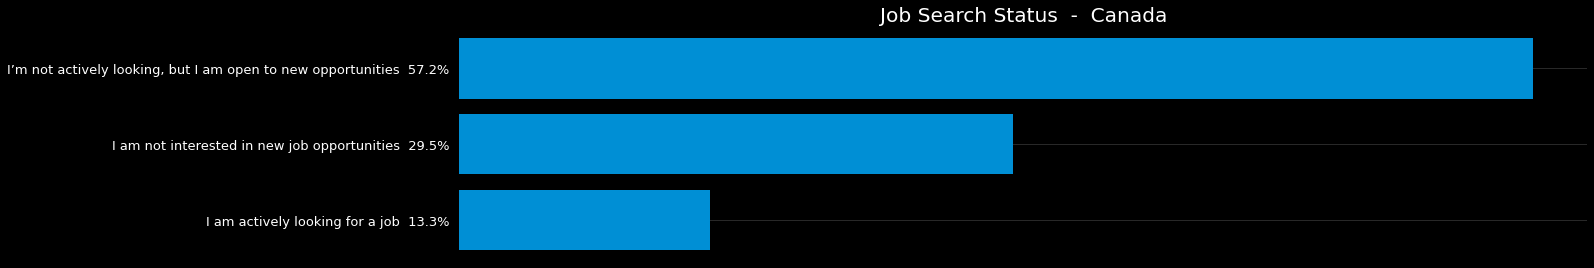

In [151]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_JobSeek = data[ (JobSeek != "NaN")   &  ( data["Country"] == i ) ]

    new_JobSeek = new_JobSeek ["JobSeek"]


    Dictionary_Distributor(new_JobSeek , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_JobSeek ,"fivethirtyeight", False , (18,4), "Job Search Status  -  " + i)  # Building a schedule



<h5 style="text-align:center; " > <b> Who's Actively Looking for a Job? </b></h1> 

C:\Users\Anri\AppData\Local\Temp\ipykernel_7228\432607635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevType.dropna(inplace=True)


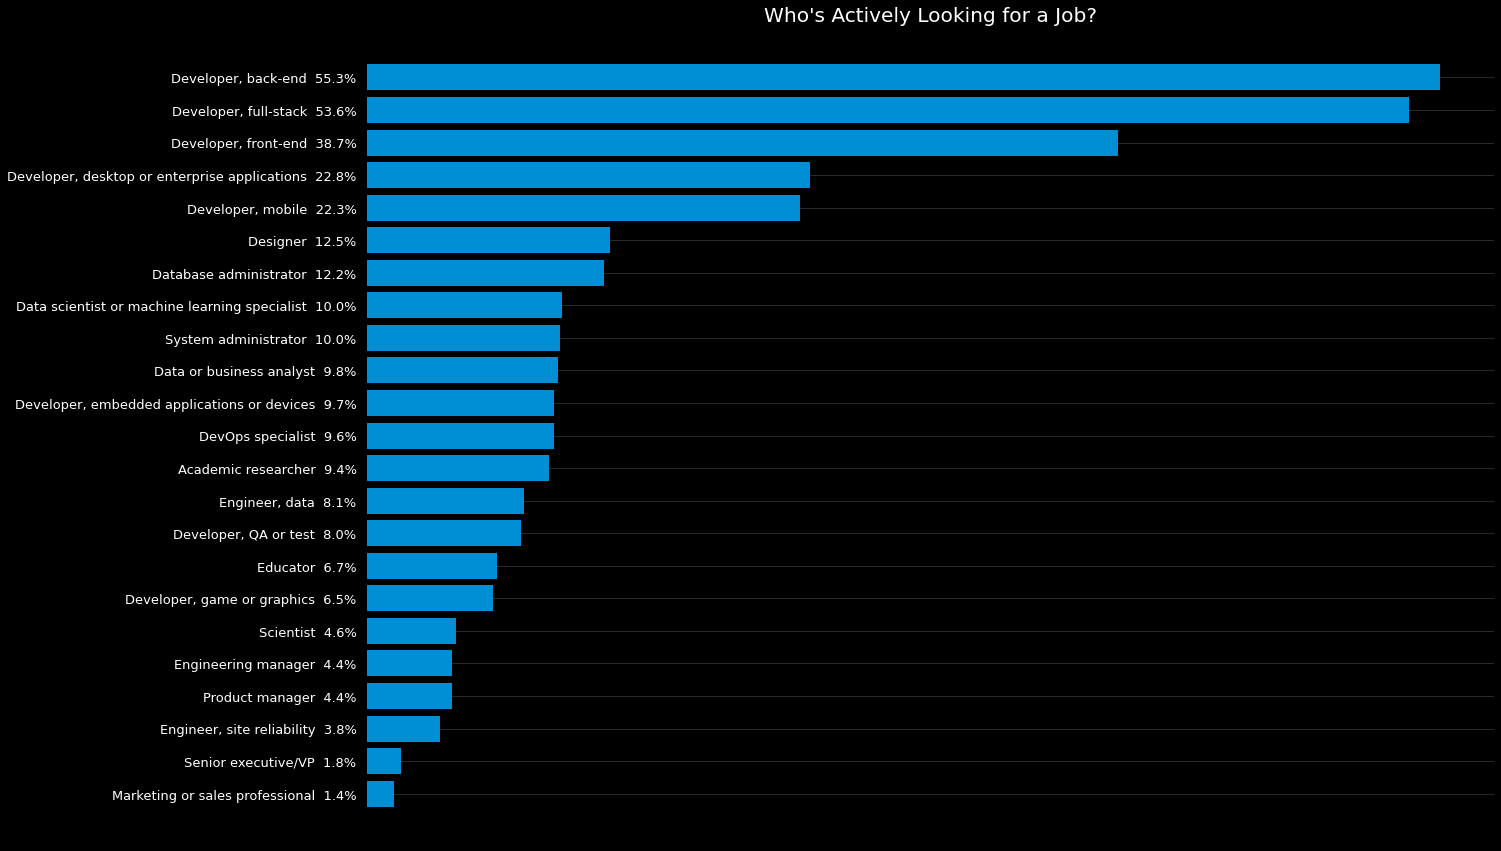

In [152]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)


new_JobSeek = data[(JobSeek == 'I am actively looking for a job')  &  ( data["DevType"] != "NaN" ) ]

new_DevType = new_JobSeek ["DevType"]

new_DevType.dropna(inplace=True)

new_DevType = new_DevType.str.split(";")


Double_list_sort_count(new_DevType , False)

Build_Barh_sizes( key_Phrases , Quantity, new_DevType ,"fivethirtyeight", False , (18,14), "Who's Actively Looking for a Job?")  # Building a schedule

<h5 style="text-align:center; " > <b> Job Hunt Factors </b></h1> 

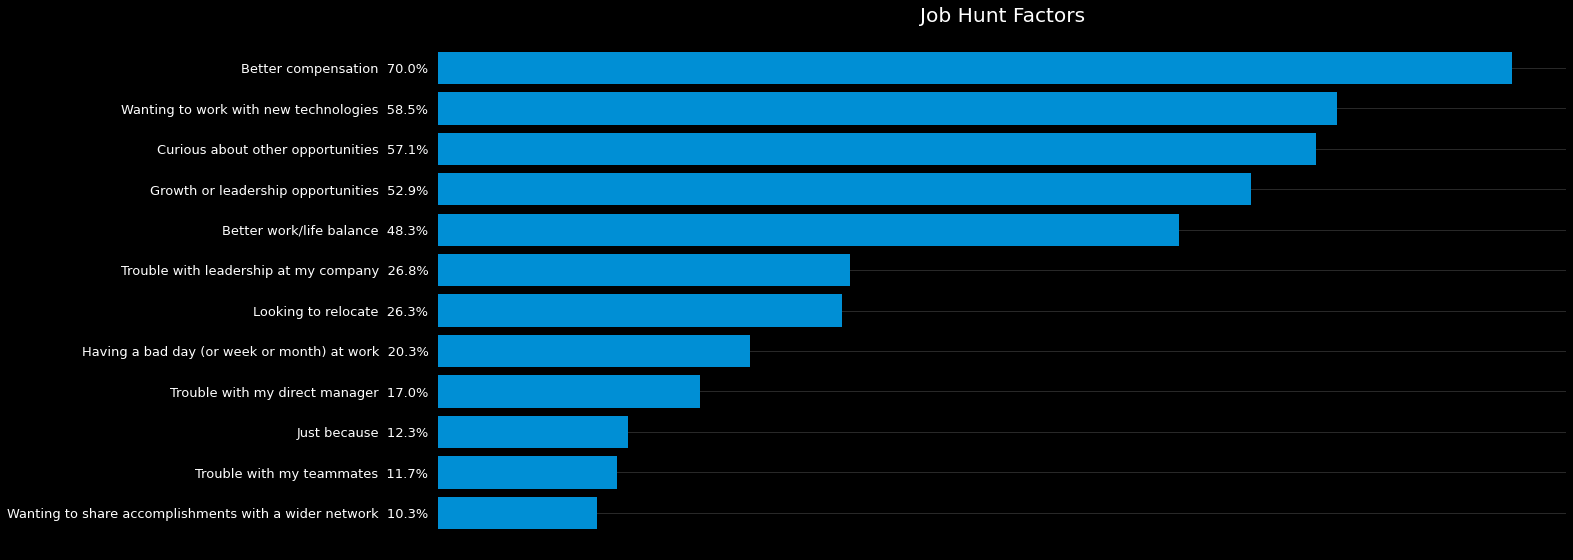

In [153]:
NEWJobHunt = data["NEWJobHunt"]
NEWJobHunt.dropna(inplace=True)


NEWJobHunt = NEWJobHunt.str.split(";")


Double_list_sort_count(NEWJobHunt , False)

Build_Barh_sizes( key_Phrases , Quantity, NEWJobHunt ,"fivethirtyeight", False , (18,9), "Job Hunt Factors")  # Building a schedule

<h5 style="text-align:center; " > <b> How do you learn about a company during a job hunt </b></h1> 

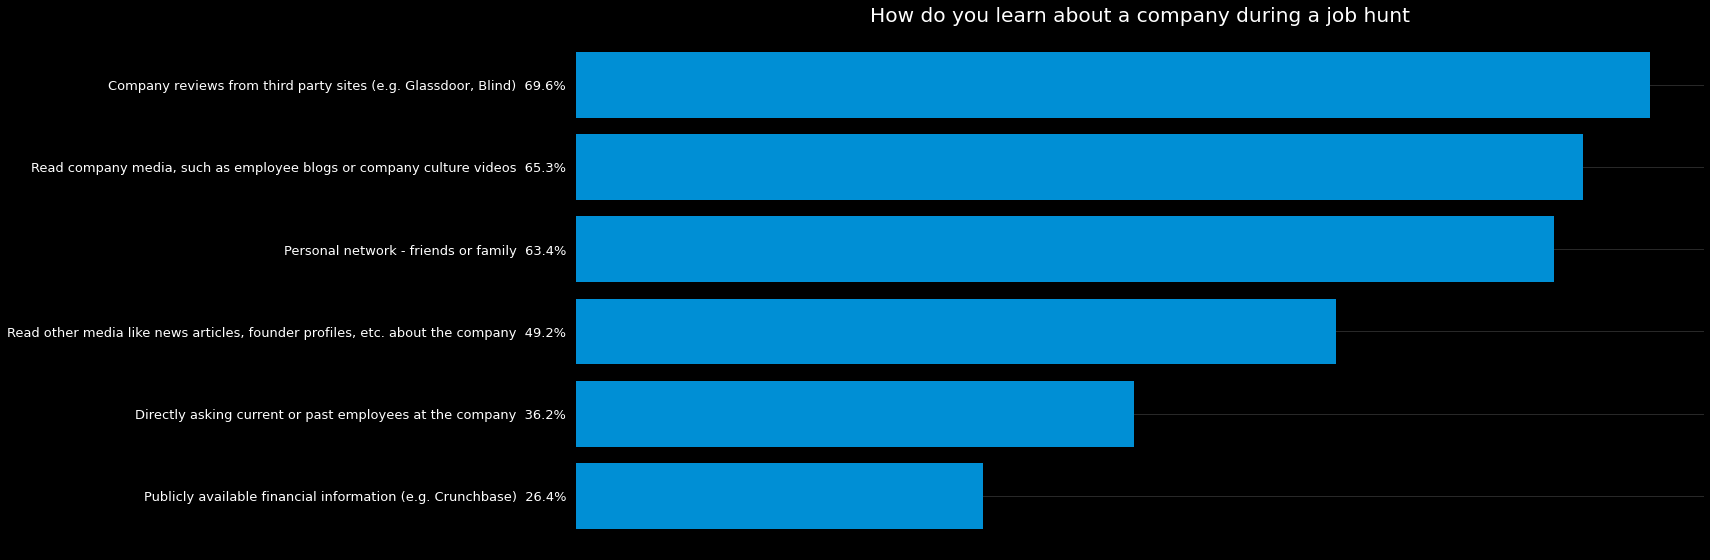

In [154]:
NEWJobHuntResearch = data["NEWJobHuntResearch"]
NEWJobHuntResearch.dropna(inplace=True)


NEWJobHuntResearch = NEWJobHuntResearch.str.split(";")


Double_list_sort_count(NEWJobHuntResearch , False)

Build_Barh_sizes( key_Phrases , Quantity, NEWJobHuntResearch ,"fivethirtyeight", False , (18,9), "How do you learn about a company during a job hunt")  # Building a schedule

#### Job Priorities


<h5 style="text-align:center; " > <b> Most Important Job Factors </b></h1> 

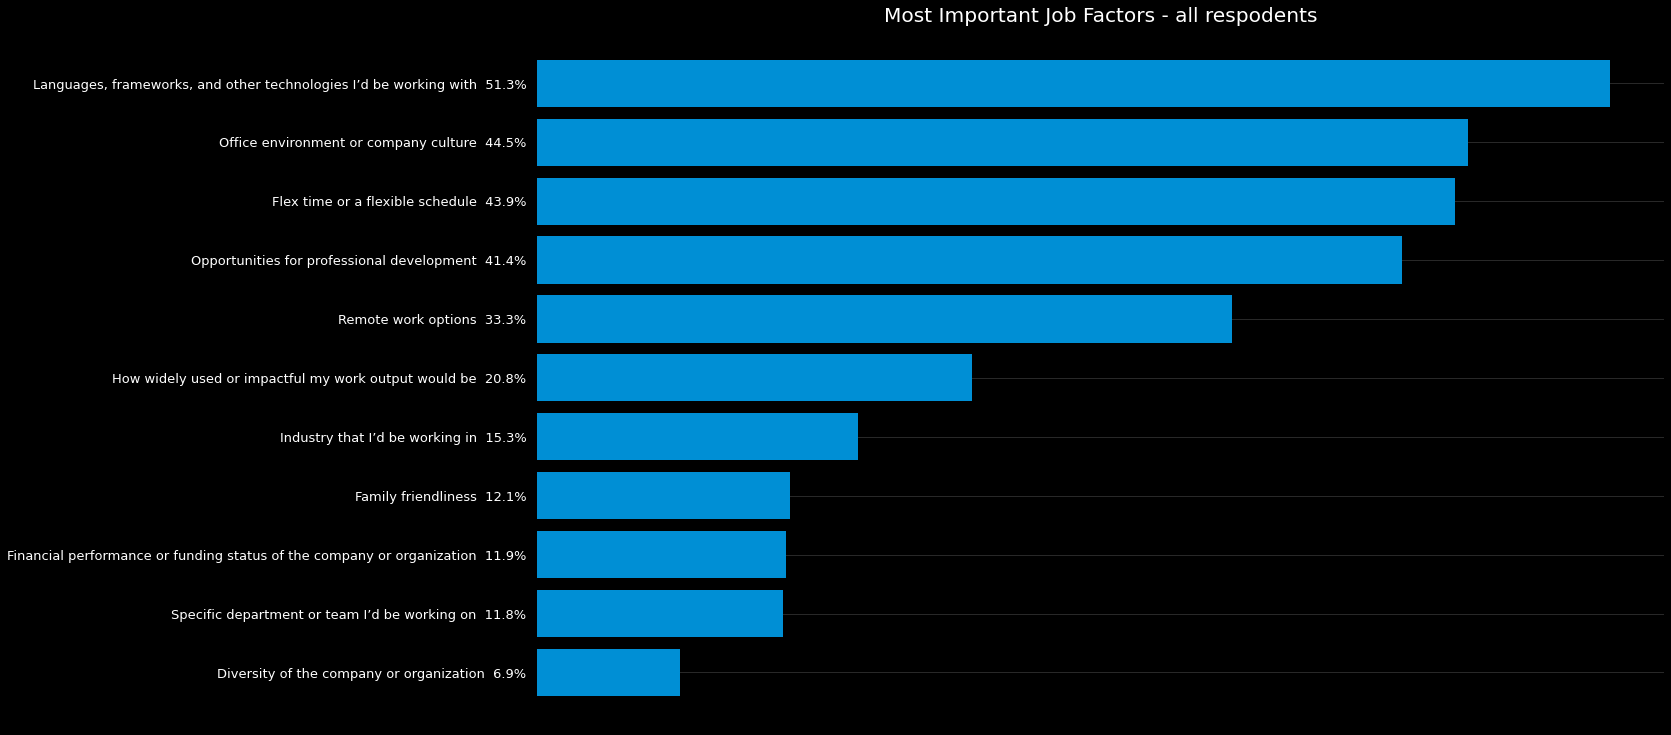

In [155]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)
JobFactors = JobFactors.str.split(";")

Double_list_sort_count(JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (18,12), "Most Important Job Factors - all respodents")  # Building a schedule

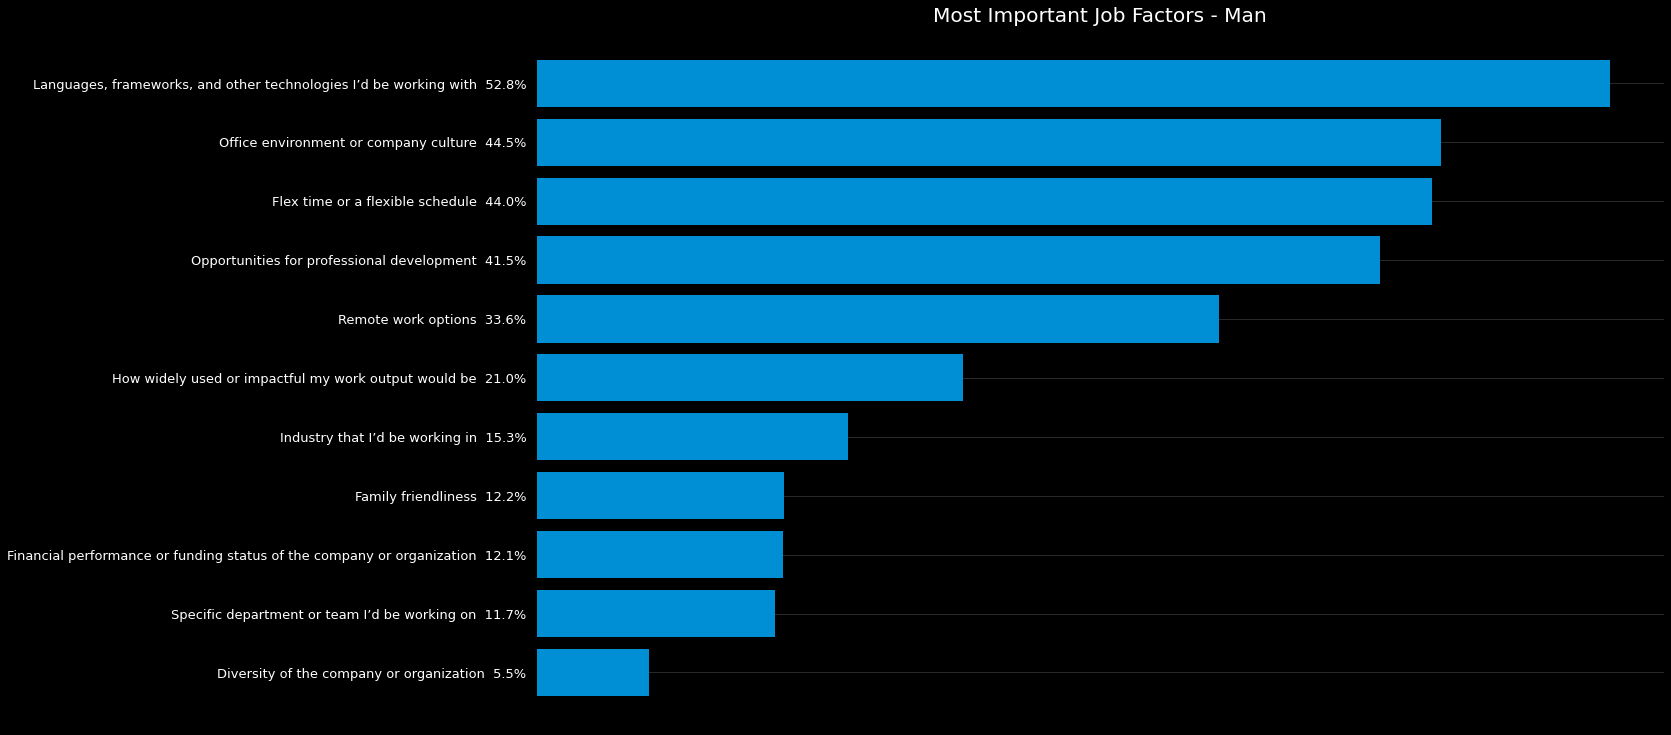

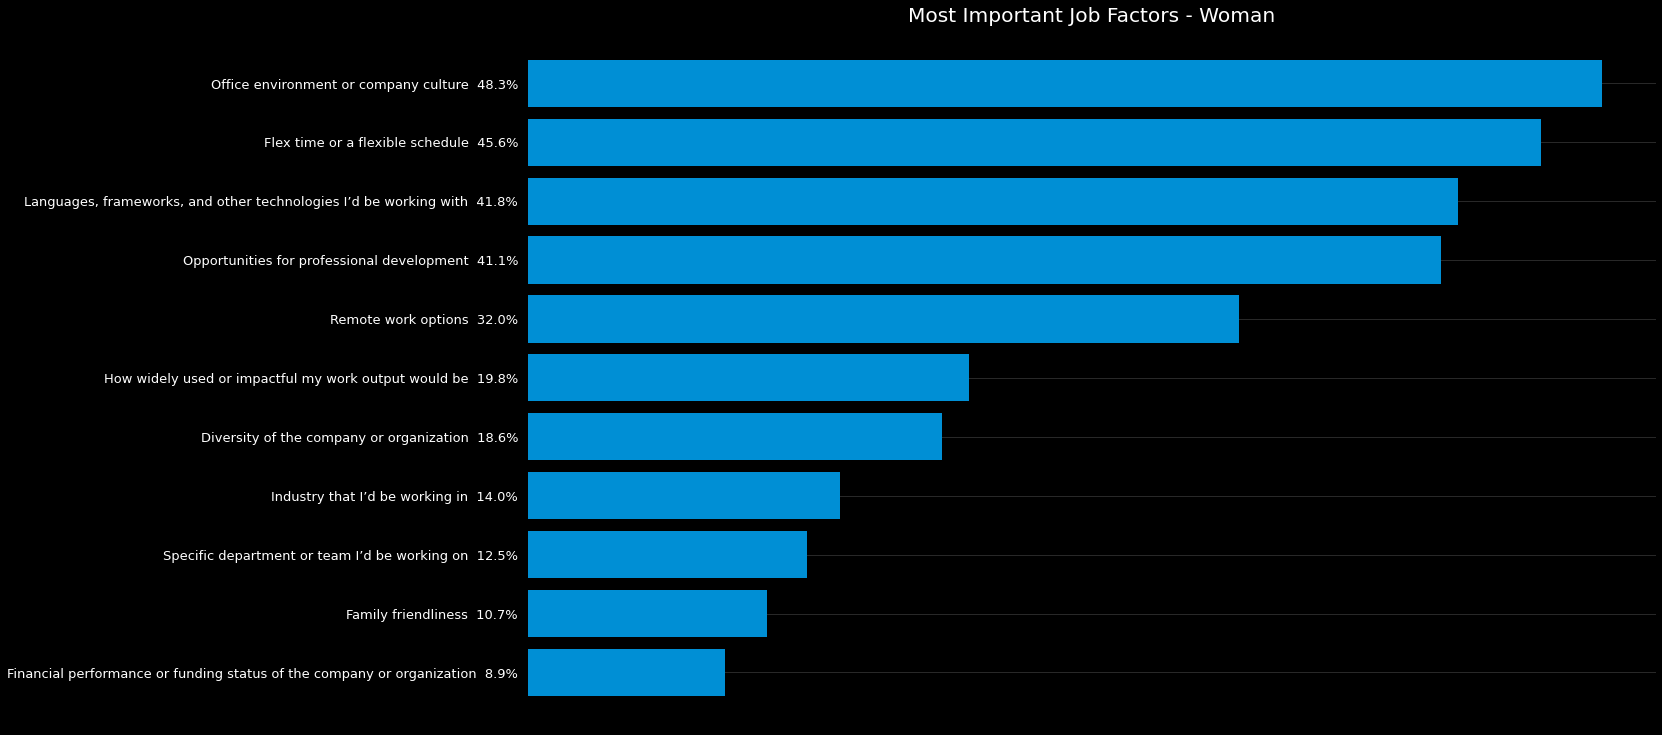

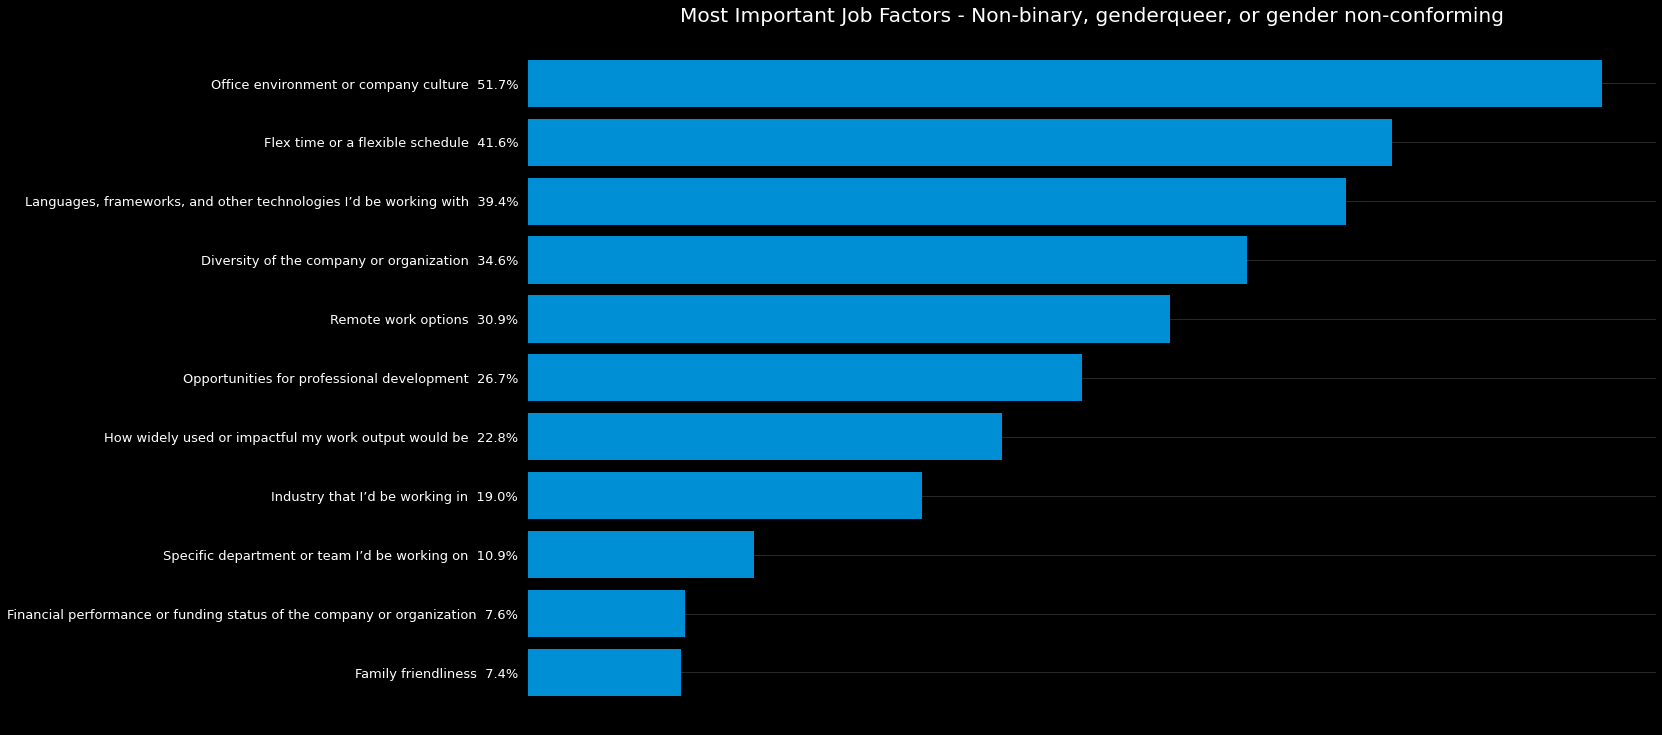

In [156]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)

Man = ["Man" , "Man;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming", "Woman;Man"  ]
Non_binary = ['Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming' ]
Woman = ['Woman','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man'  ]

Gender = [Man, Woman, Non_binary]

for i in Gender:
    new_list = []

    for k in i:
        new_data = data[ (JobFactors != "NaN") & ( data["Gender"] == k)]

        new_JobFactors = new_data["JobFactors"]
        new_JobFactors = new_JobFactors.str.split(";")

        for s in new_JobFactors:
            new_list.append(s)
    

    

    Double_list_sort_count(new_list , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_list ,"fivethirtyeight", False , (18,12), "Most Important Job Factors - " + i[0])  # Building a schedule


<h5 style="text-align:center; " > <b> Weighting Important Job Factors in the US </b></h1> 

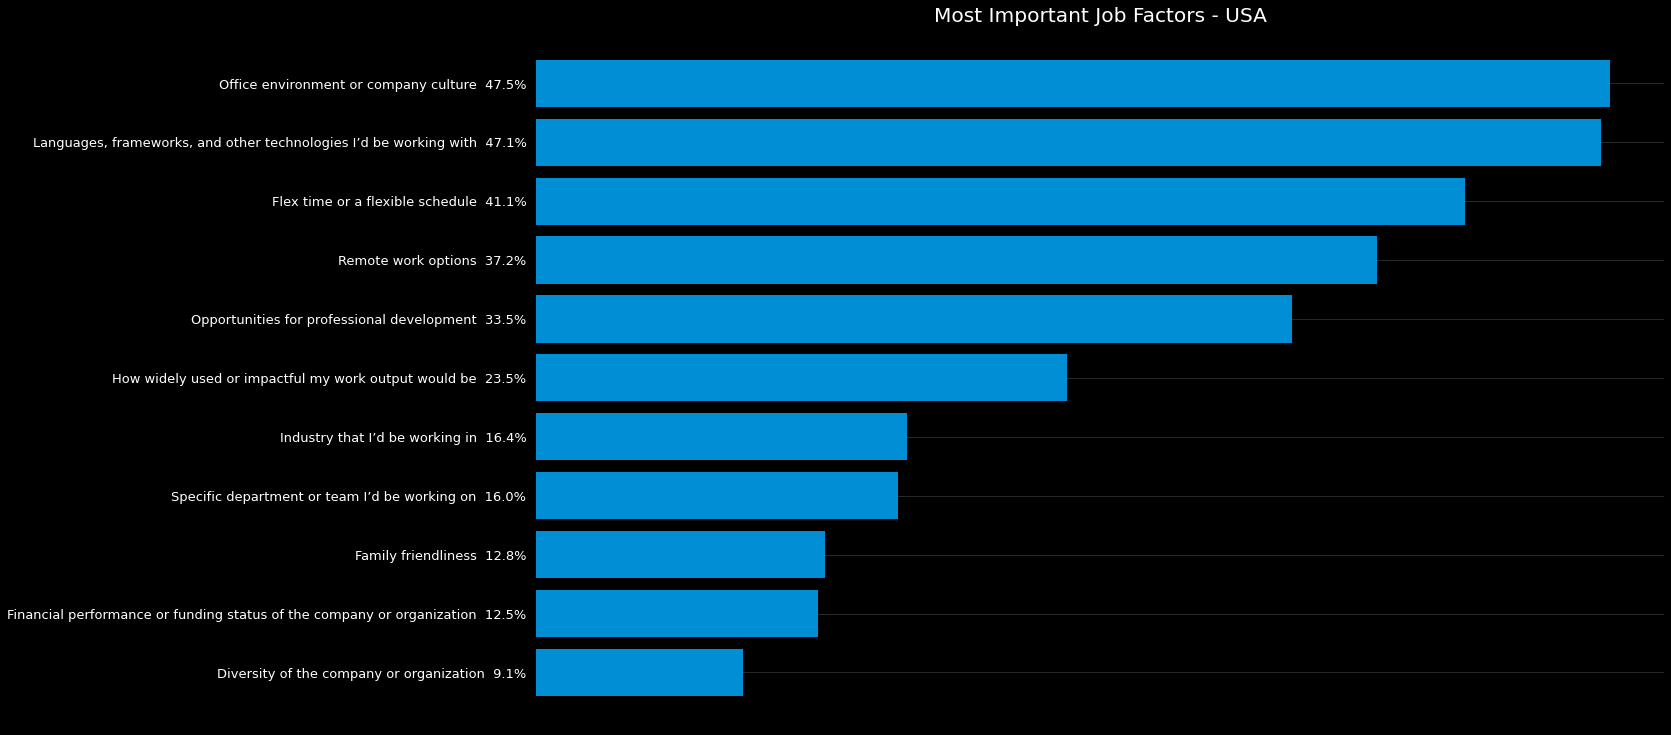

In [157]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)


new_data = data[ (JobFactors != "NaN") & (data["Country"] == "United States")]

new_JobFactors = new_data["JobFactors"]
new_JobFactors = new_JobFactors.str.split(";")

Double_list_sort_count(new_JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, new_JobFactors ,"fivethirtyeight", False , (18,12), "Most Important Job Factors - USA")  # Building a schedule


## Community

#### Site Use


<h5 style="text-align:center; " > <b> Visiting Stack Overflow </b></h1> 

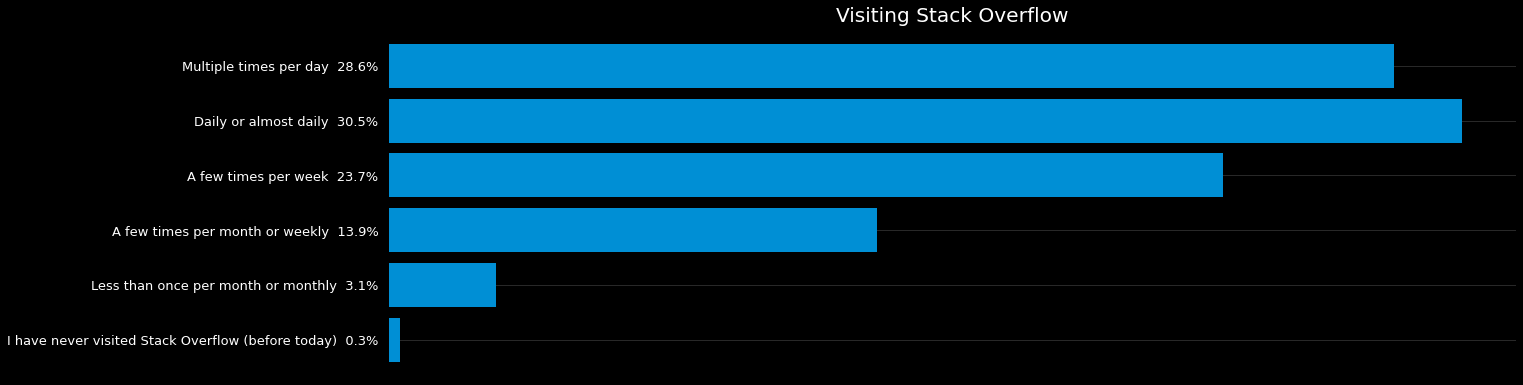

In [158]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,6), "Visiting Stack Overflow")   # Building a schedule

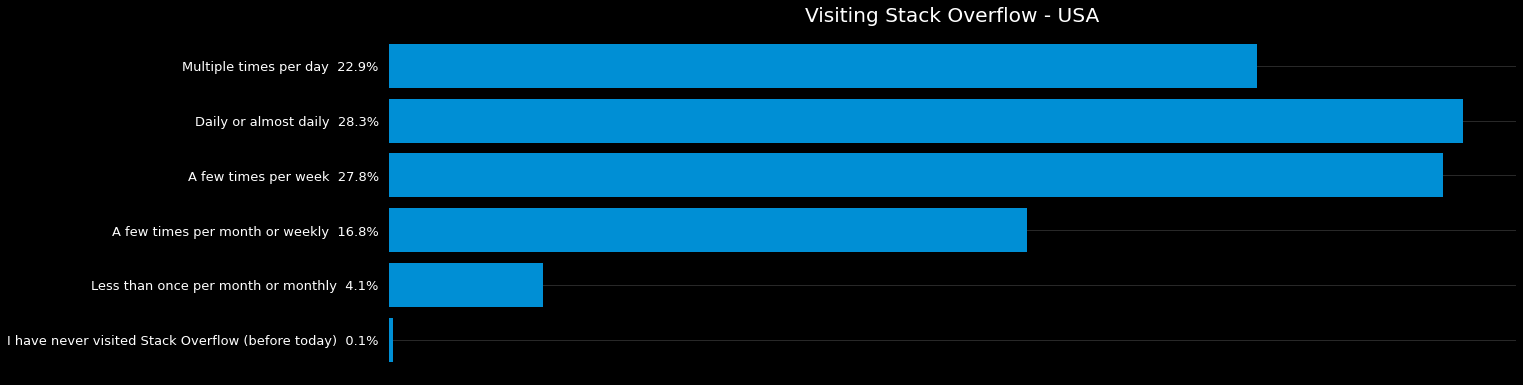

In [159]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

new_SOVisitFreq = data[ (SOVisitFreq != 'nan') & (data["Country"] == "United States")]
SOVisitFreq = new_SOVisitFreq["SOVisitFreq"]

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,6), "Visiting Stack Overflow - USA")   # Building a schedule

<h5 style="text-align:center; " > <b> How Many Participants Have a Stack Overflow Account? </b></h5> 

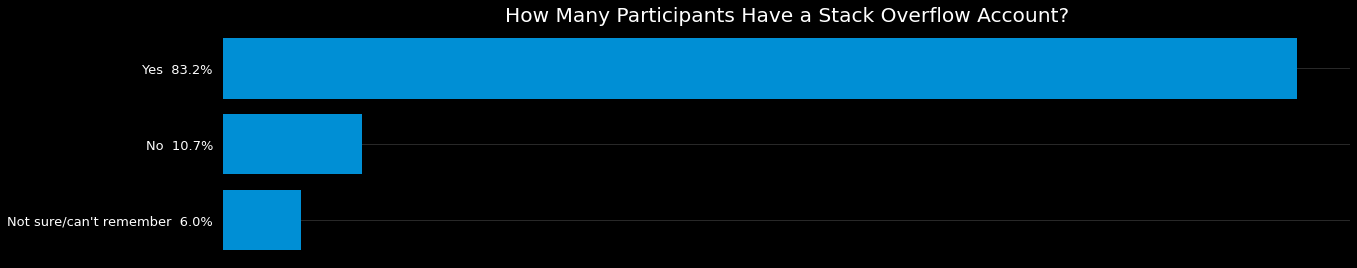

In [160]:
SOAccount = data['SOAccount']
SOAccount.dropna(inplace=True)

Dictionary_Distributor(SOAccount, False)

Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,4), "How Many Participants Have a Stack Overflow Account?")   # Building a schedule

<h5 style="text-align:center; " > <b> Visited SE sites </b></h1>

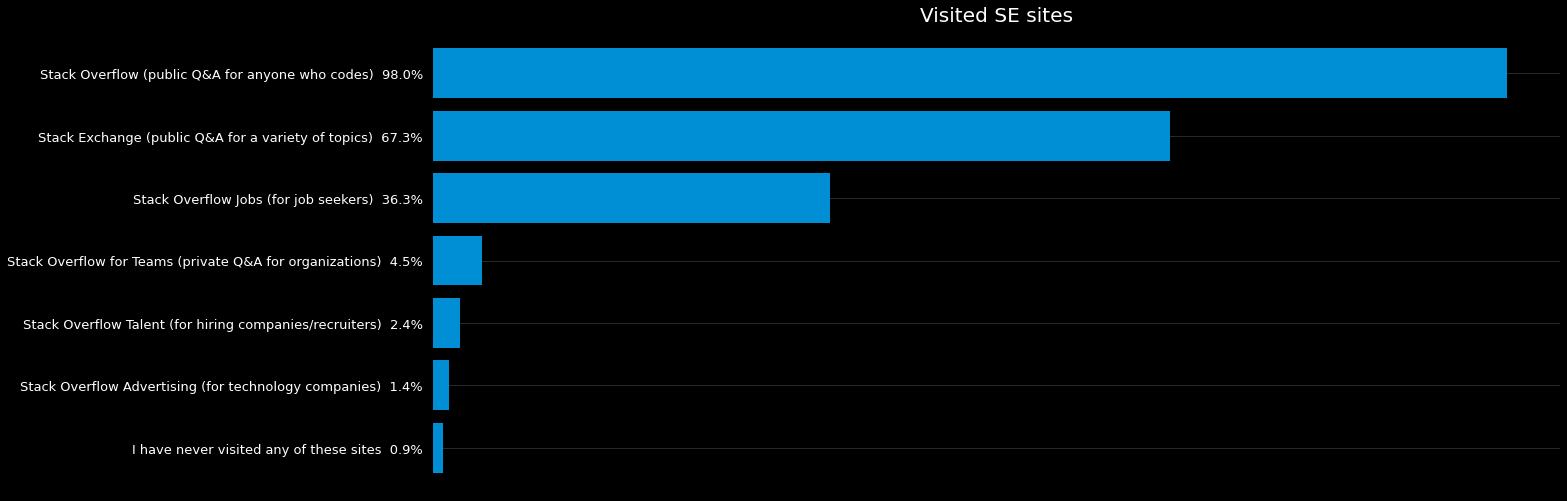

In [161]:
NEWSOSites = data['NEWSOSites']
NEWSOSites.dropna(inplace=True)
NEWSOSites = NEWSOSites.str.split(";")

Double_list_sort_count(NEWSOSites, False)

Build_Barh_sizes( key_Phrases , Quantity, NEWSOSites ,"fivethirtyeight", False , (18,8), "Visited SE sites")   # Building a schedule

####    Stack Overflow Community Now

<h5 style="text-align:center; " > <b> How Often Do Developers Participate on Stack Overflow? </b></h1> 

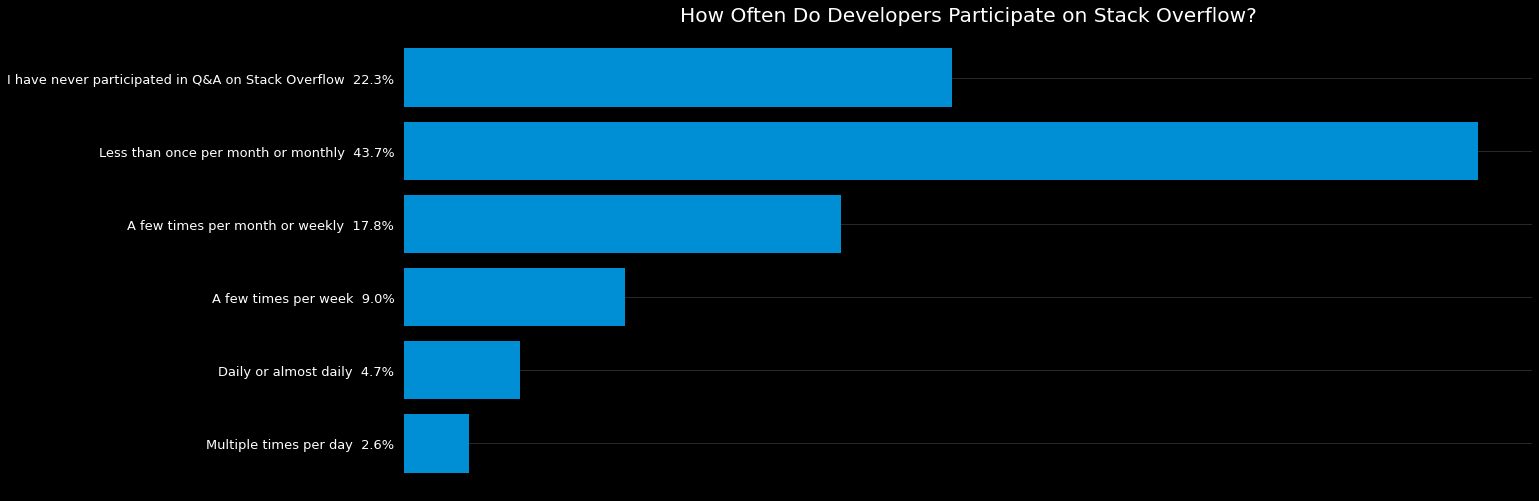

In [162]:
SOPartFreq = data["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,8), "How Often Do Developers Participate on Stack Overflow?")   # Building a schedule

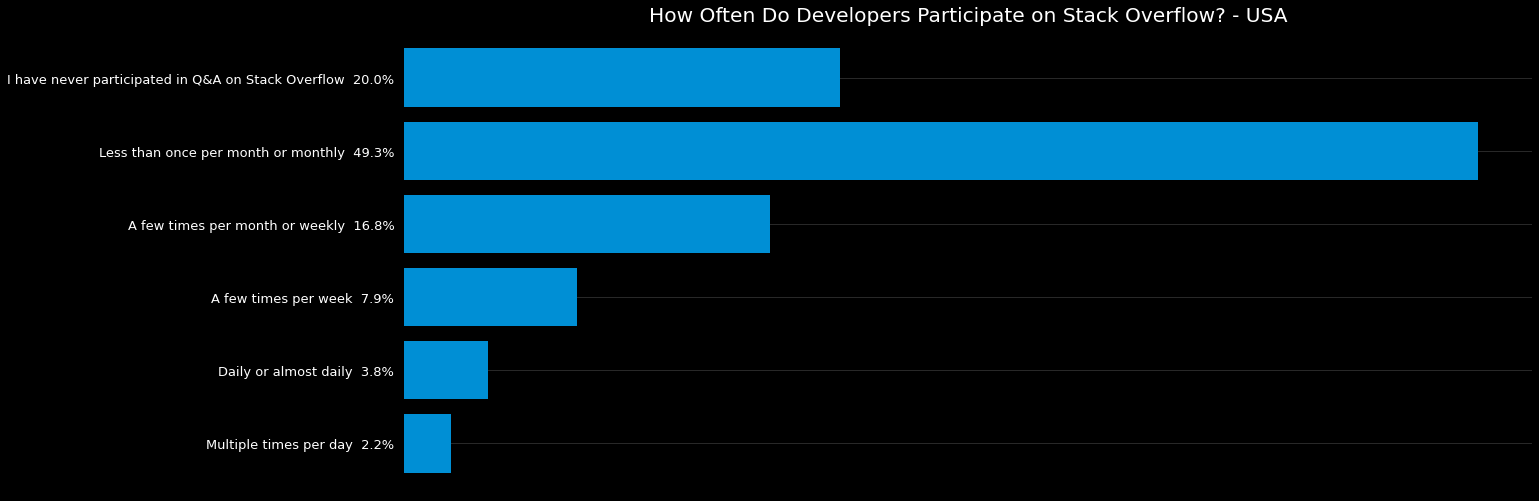

In [163]:
SOPartFreq = data ["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

new_SOPartFreq = data[ (SOPartFreq != 'nan') & (data["Country"] == "United States")]
SOPartFreq = new_SOPartFreq["SOPartFreq"]

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,8), "How Often Do Developers Participate on Stack Overflow? - USA")   # Building a schedule

<h5 style="text-align:center; " > <b> Do Developers Consider Themselves Part of the Stack Overflow Community? </b></h1> 

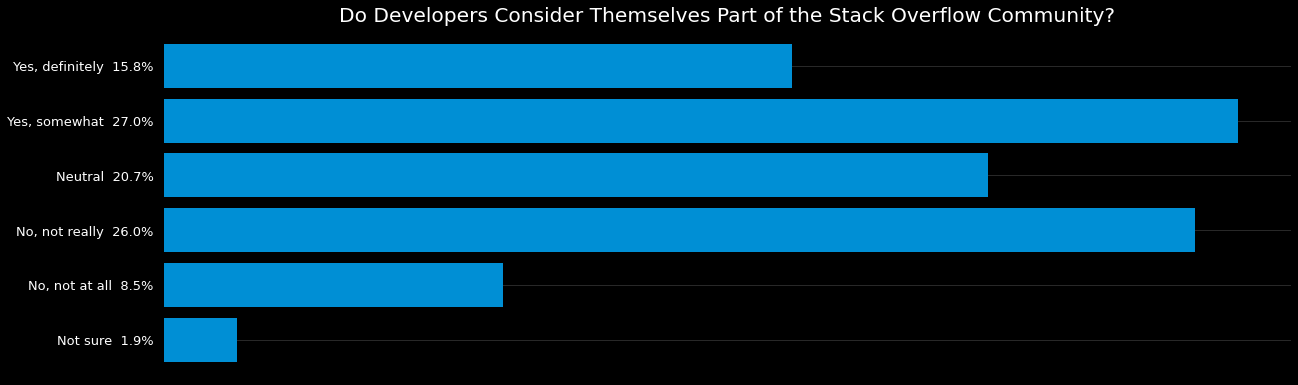

In [164]:
SOComm = data["SOComm"]
SOComm.dropna(inplace=True)

SOComm_Counted = Counter(SOComm)

key_Phrases =  ['Yes, definitely','Yes, somewhat','Neutral','No, not really', 'No, not at all' , 'Not sure'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOComm_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOComm ,"fivethirtyeight", False , (18,6), 'Do Developers Consider Themselves Part of the Stack Overflow Community?')   # Building a schedule

<h5 style="text-align:center; " > <b> Is Stack Overflow More Welcoming Than Last Year? </b></h1> 

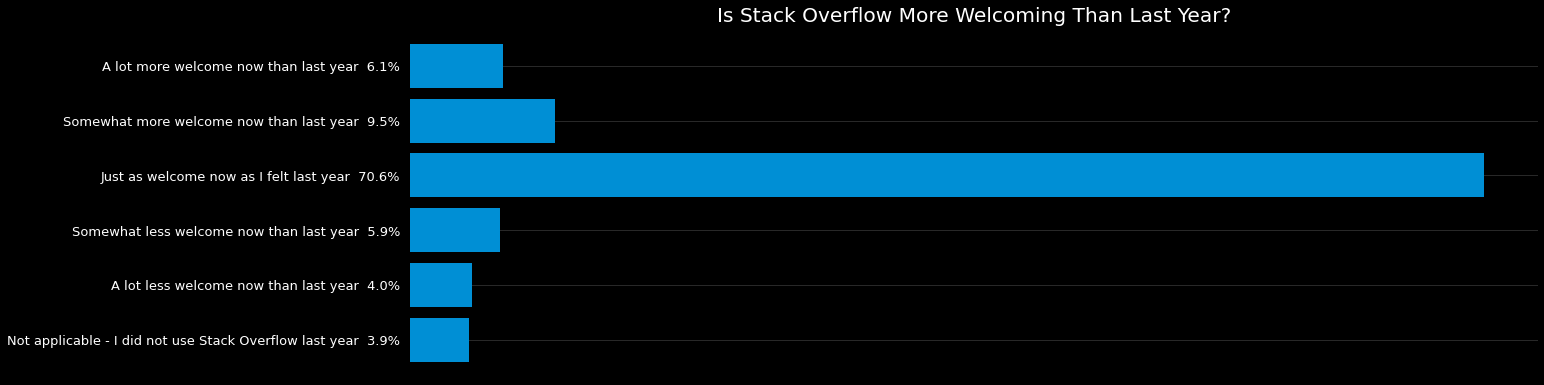

In [165]:
WelcomeChange = data["WelcomeChange"]
WelcomeChange.dropna(inplace=True)

WelcomeChange_Counted = Counter(WelcomeChange)

key_Phrases =  ['A lot more welcome now than last year','Somewhat more welcome now than last year','Just as welcome now as I felt last year','Somewhat less welcome now than last year', 'A lot less welcome now than last year' , 'Not applicable - I did not use Stack Overflow last year'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(WelcomeChange_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, WelcomeChange ,"fivethirtyeight", False , (18,6), 'Is Stack Overflow More Welcoming Than Last Year?')   # Building a schedule

<h5 style="text-align:center; " > <b> Member of other online developer community </b></h1> 

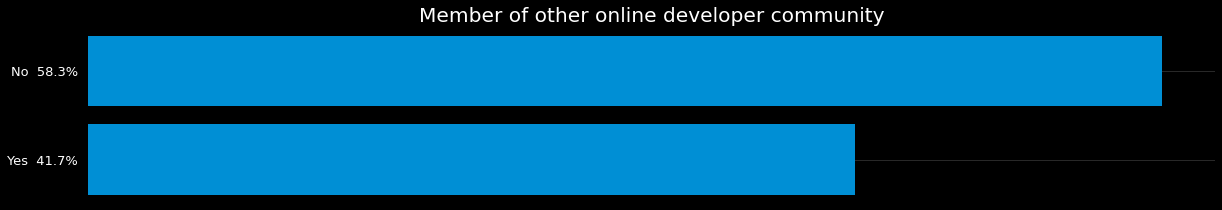

In [166]:
NEWOtherComms = data["NEWOtherComms"]
NEWOtherComms.dropna(inplace=True)

NEWOtherComms = NEWOtherComms.str.split(";")

Double_list_sort_count(NEWOtherComms, False)

Build_Barh_sizes( key_Phrases , Quantity, NEWOtherComms ,"fivethirtyeight", False , (18,3), 'Member of other online developer community')   # Building a schedule


#### Stack Overflow Community Moving Forward

<h5 style="text-align:center; " > <b> Relax restrictions on off-topic </b></h1> 

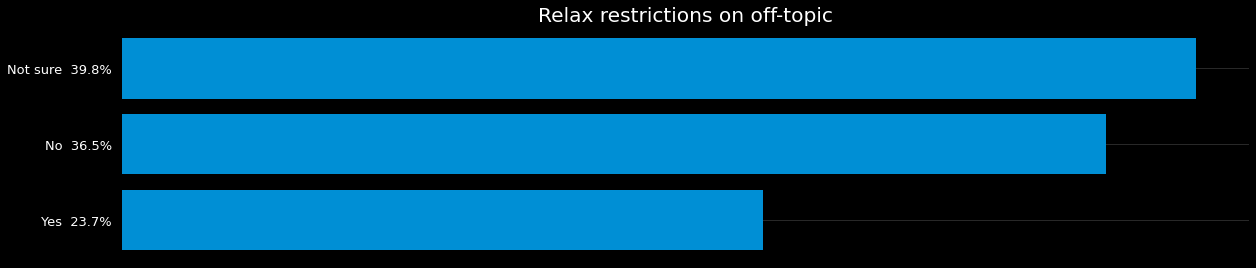

In [167]:
NEWOffTopic = data["NEWOffTopic"]
NEWOffTopic.dropna(inplace=True)

NEWOffTopic = NEWOffTopic.str.split(";")

Double_list_sort_count(NEWOffTopic, False)

Build_Barh_sizes( key_Phrases , Quantity, NEWOffTopic ,"fivethirtyeight", False , (18,4), 'Relax restrictions on off-topic')   # Building a schedule
